In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
from copy import deepcopy
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import minmax_scale
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize
from sklearn.cluster import SpectralClustering
import random
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
data=pd.read_csv('project.csv')
data

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [ ]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
col=data.keys()
for i in col:
    print(f"The number of unique value for feature {i} is :{data[i].nunique()}")


The number of unique value for feature country is :167
The number of unique value for feature child_mort is :139
The number of unique value for feature exports is :147
The number of unique value for feature health is :147
The number of unique value for feature imports is :151
The number of unique value for feature income is :156
The number of unique value for feature inflation is :156
The number of unique value for feature life_expec is :127
The number of unique value for feature total_fer is :138
The number of unique value for feature gdpp is :157


In [ ]:
print(data['country'].nunique())
print(data.shape)
#so we can say there is no country having two diffirent data as number of rows is equal to no of unique country.

167
(167, 10)


In [ ]:
mean=data.describe().iloc[1,:]
print("Mean of all the column:->")
mean

Mean of all the column:->


child_mort       38.270060
exports          41.108976
health            6.815689
imports          46.890215
income        17144.688623
inflation         7.781832
life_expec       70.555689
total_fer         2.947964
gdpp          12964.155689
Name: mean, dtype: float64

In [ ]:
column=data.keys()
column=column[1:]
min=[]
max=[]
for i in column:
    index_for_min=np.argmin(data[i])
    index_for_max=np.argmax(data[i])
    min.append(data['country'][index_for_min])
    max.append(data['country'][index_for_max])
index=['Features','Minimun','Maximum']
df_2=pd.DataFrame([column[1:],min,max],index=index)
df_2

0          1              2          3                 4  \
Features  exports     health        imports     income         inflation   
Minimun   Iceland    Myanmar          Qatar    Myanmar  Congo, Dem. Rep.   
Maximum     Haiti  Singapore  United States  Singapore             Qatar   

                   5          6          7           8  
Features  life_expec  total_fer       gdpp        None  
Minimun   Seychelles      Haiti  Singapore     Burundi  
Maximum      Nigeria      Japan      Niger  Luxembourg

In [ ]:
#For country less than the international average of that feature
def country_less(a):
    print(f"Countries who's {a} value is less than intertional average")
    print()
    col=data['country'][data[a]<np.mean(data[a])]
    dictionary = {}
    for string in col:
        key = string[0]
        if key in dictionary:
            dictionary[key].append(string)
        else:
            dictionary[key] = [string]
    for key,val in dictionary.items():
        print(f"{key}:-> {val}")
country_less('child_mort')

Countries who's child_mort value is less than intertional average

A:-> ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria']
B:-> ['Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria']
C:-> ['Canada', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic']
D:-> ['Denmark', 'Dominican Republic']
E:-> ['Ecuador', 'Egypt', 'El Salvador', 'Estonia']
F:-> ['Fiji', 'Finland', 'France']
G:-> ['Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana']
H:-> ['Hungary']
I:-> ['Iceland', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy']
J:-> ['Jamaica', 'Japan', 'Jordan']
K:-> ['Kazakhstan', 'Kuwait', 'Kyrgyz Republic']
L:-> ['Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg']
M:-> ['Macedonia, FYR', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco']
N:-> ['Netherlands', 'New Zealand'

In [ ]:
#For country more than the international average of that feature
def country_more(a,df):
    print(f"Countries who's {a} value is more than intertional average")
    print()
    col=df['country'][df[a]>=np.mean(df[a])]
    dictionary = {}
    for string in col:
        key = string[0]
        if key in dictionary:
            dictionary[key].append(string)
        else:
            dictionary[key] = [string]
    for key,val in dictionary.items():
        print(f"{key}:-> {val}")
country_more('child_mort',data)

Countries who's child_mort value is more than intertional average

A:-> ['Afghanistan', 'Angola', 'Azerbaijan']
B:-> ['Bangladesh', 'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi']
C:-> ['Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire"]
E:-> ['Equatorial Guinea', 'Eritrea']
G:-> ['Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau']
H:-> ['Haiti']
I:-> ['India']
K:-> ['Kenya', 'Kiribati']
L:-> ['Lao', 'Lesotho', 'Liberia']
M:-> ['Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Mozambique', 'Myanmar']
N:-> ['Namibia', 'Nepal', 'Niger', 'Nigeria']
P:-> ['Pakistan']
R:-> ['Rwanda']
S:-> ['Senegal', 'Sierra Leone', 'South Africa', 'Sudan']
T:-> ['Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Turkmenistan']
U:-> ['Uganda']
Y:-> ['Yemen']
Z:-> ['Zambia']


In [ ]:
names=data['country']
data=data.drop(['country'],axis=1)
data

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89   4460  
3         6.16   3530  
4         2.13  12200  
..         ...    ...  
162       3.50   2970  
163       2.47  13500  
164       1.95   1310  
165       4.67   1310  
166       5.40   1460  

[167 rows x 9 columns]

In [ ]:
data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

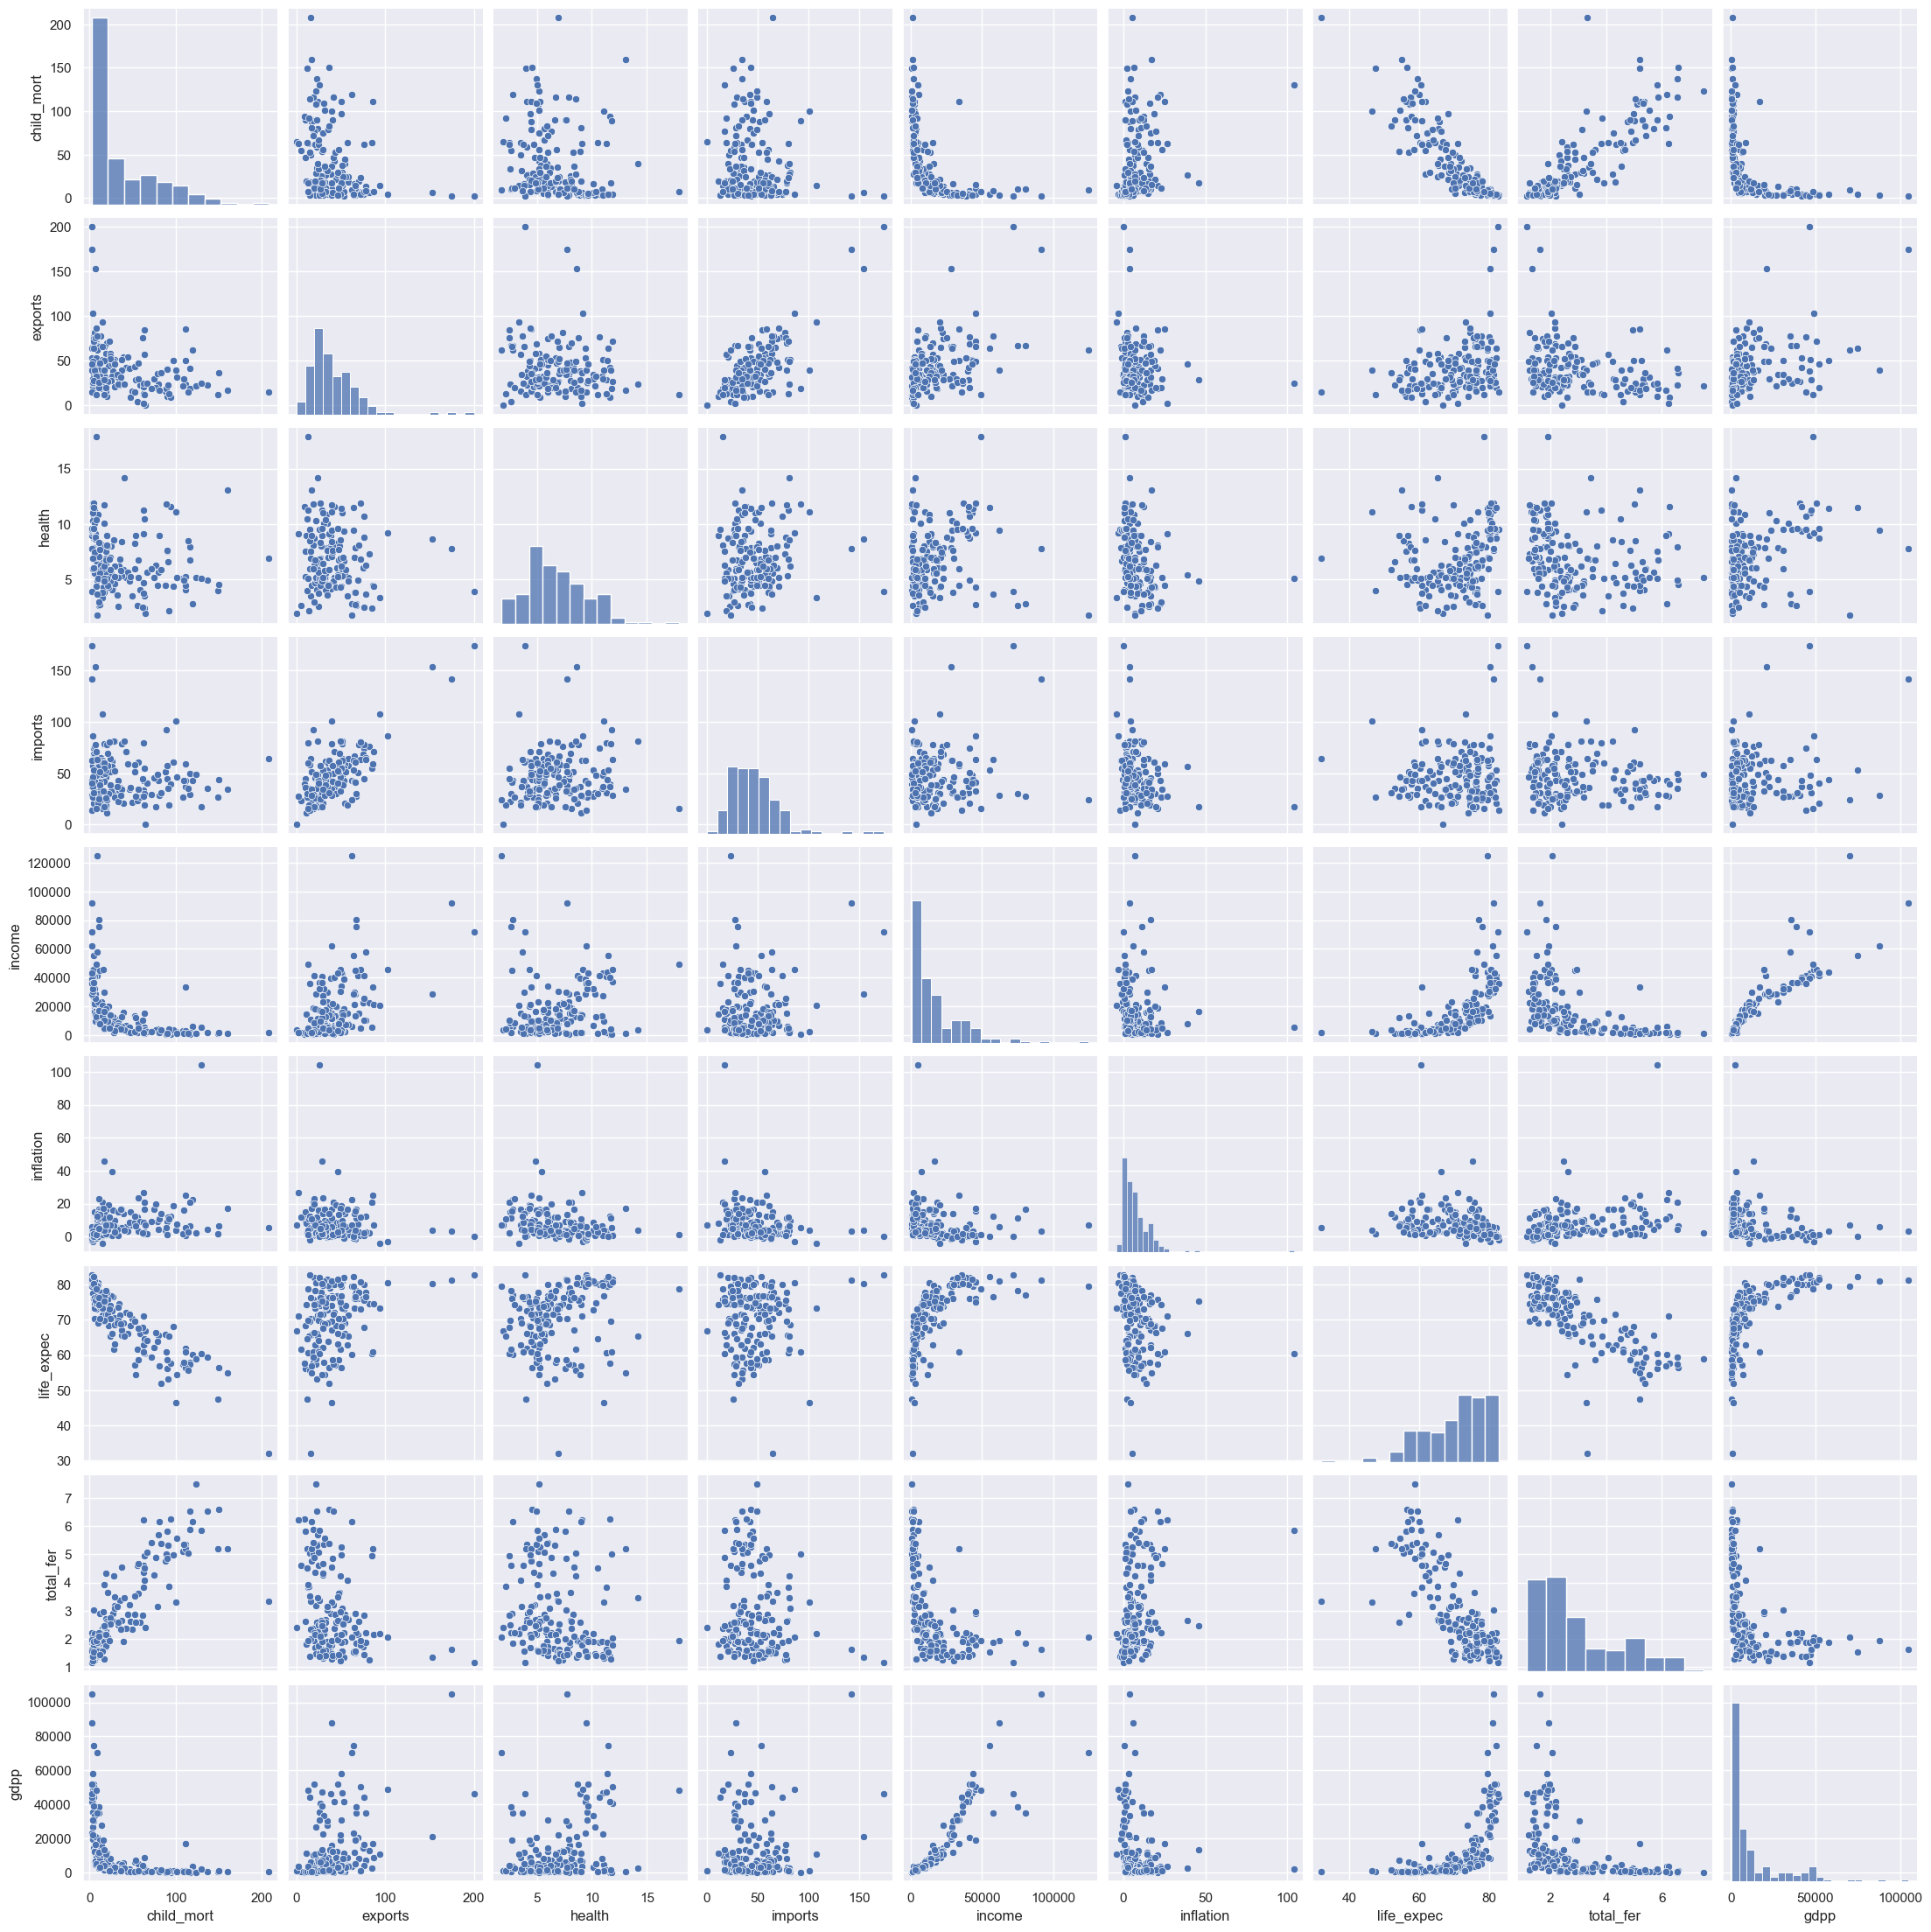

In [ ]:
sns.pairplot(data)
sns.set(rc={'figure.figsize':(17,17)})
plt.show();

In [ ]:
data3=data.copy(deep=True)
def densityplot(column,data):
    sns.distplot(data[column], fit=norm);
    sns.set(rc={'figure.figsize':(7,5)})
    plt.xlabel(column.capitalize())
    plt.title('Density VS ' + column.capitalize())
    print("Skewness of the plot for "+column.capitalize()+':',data[column].skew())
    print("Kurtosis of the plot for "+column.capitalize()+':',data[column].kurt())
    fig = plt.figure()
    res = stats.probplot(data[column], plot=plt)

def logtransformation(column,data):
    data[column] = np.log(data[column])
    densityplot(column,data)

In [ ]:
data2=data3.copy(deep=True)

Skewness of the plot for Gdpp: 2.2180514519497163
Kurtosis of the plot for Gdpp: 5.527890806297906


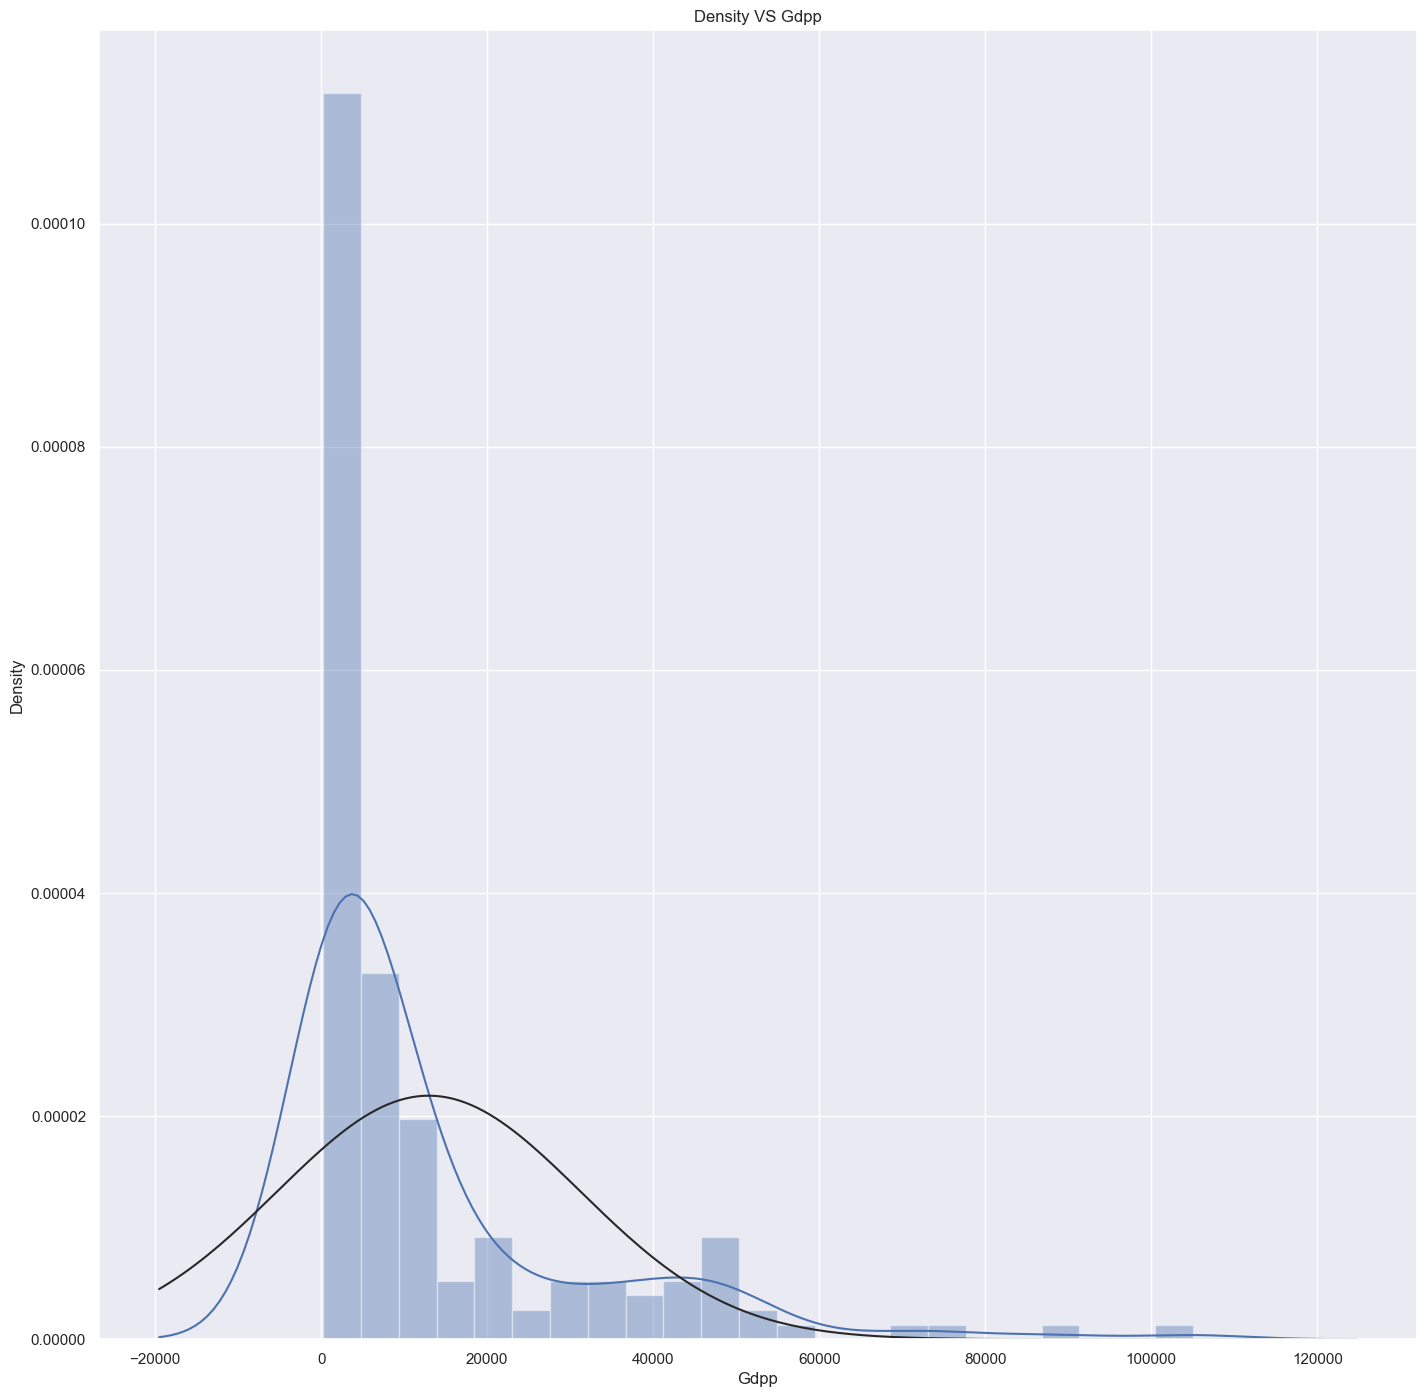

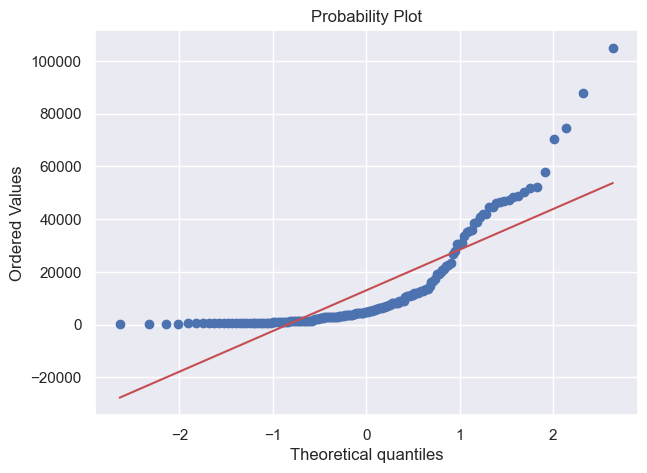

In [ ]:
densityplot('gdpp',data3)

Skewness of the plot for Gdpp: 0.005751522051156886
Kurtosis of the plot for Gdpp: -0.9549497230101456


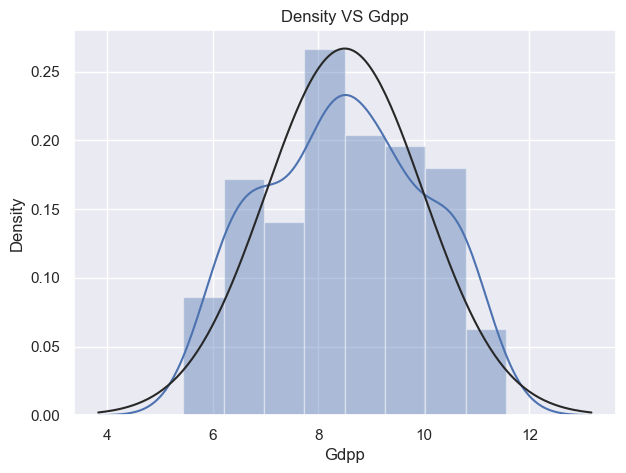

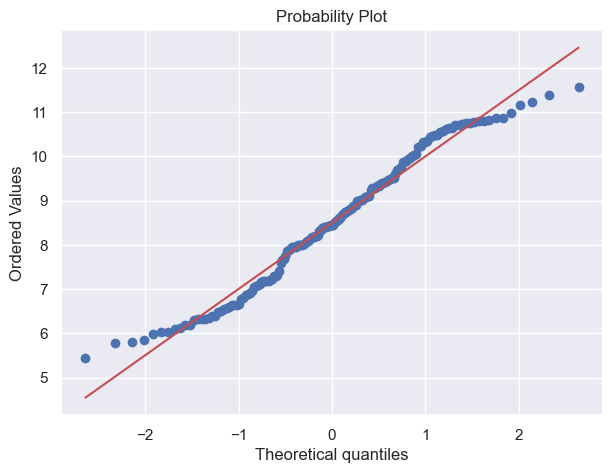

In [ ]:
logtransformation('gdpp',data2)

Skewness of the plot for Child_mort: 1.4507735387555047
Kurtosis of the plot for Child_mort: 1.76688194174872


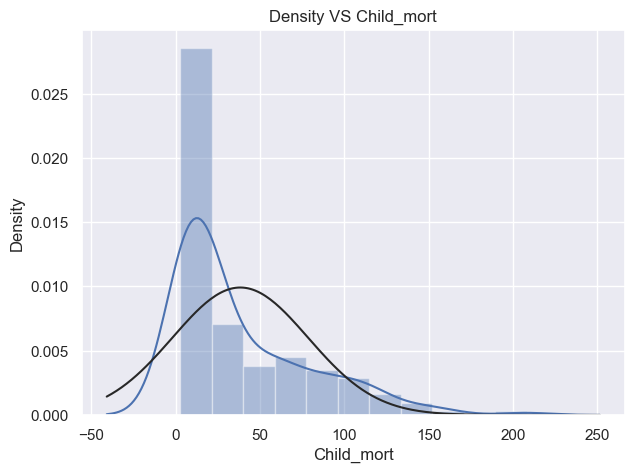

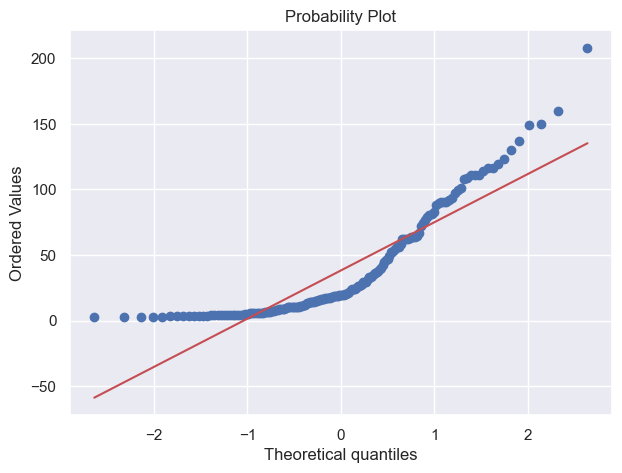

In [ ]:
densityplot('child_mort',data3)

Skewness of the plot for Child_mort: -0.01799368156814551
Kurtosis of the plot for Child_mort: -1.135330328967668


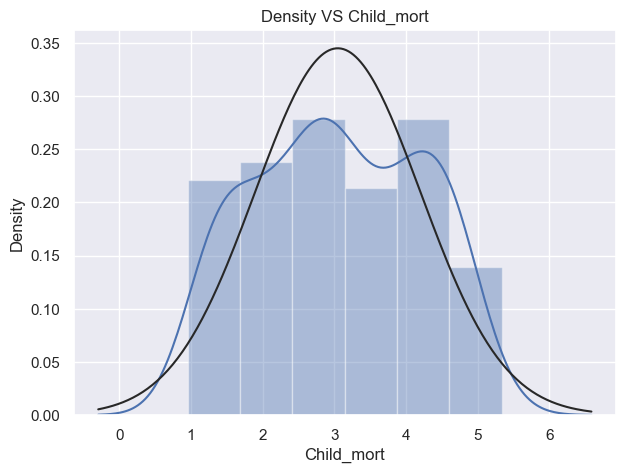

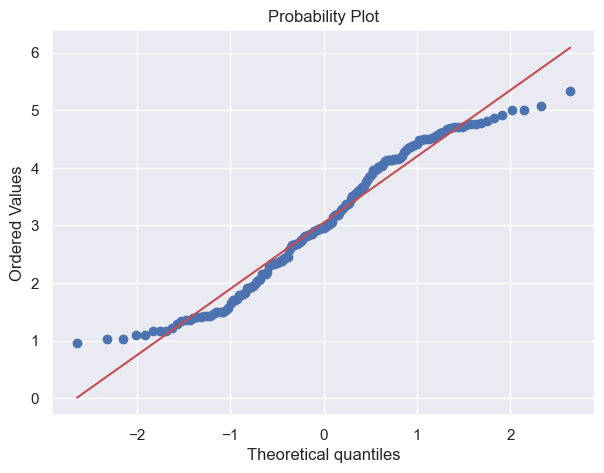

In [ ]:
logtransformation('child_mort',data2)

Skewness of the plot for Exports: 2.4458240051613496
Kurtosis of the plot for Exports: 10.138666385575297


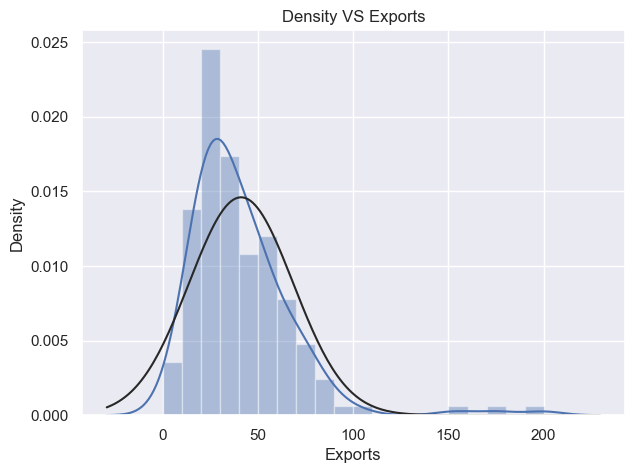

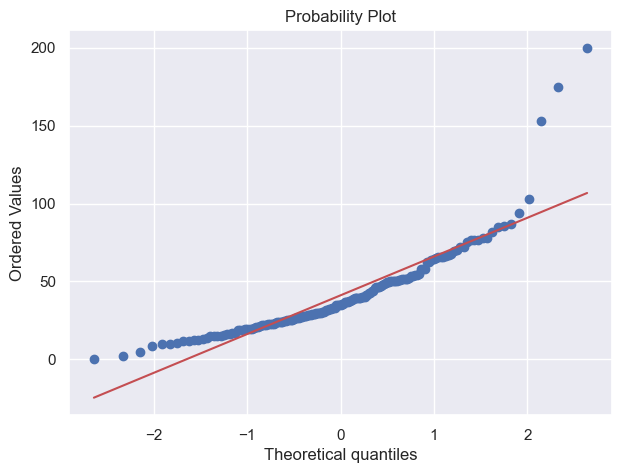

In [ ]:
densityplot('exports',data3)

Skewness of the plot for Exports: -2.7150651572922944
Kurtosis of the plot for Exports: 18.264726827635513


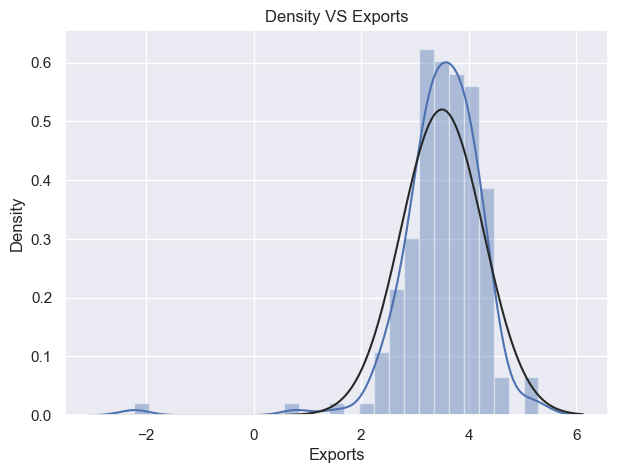

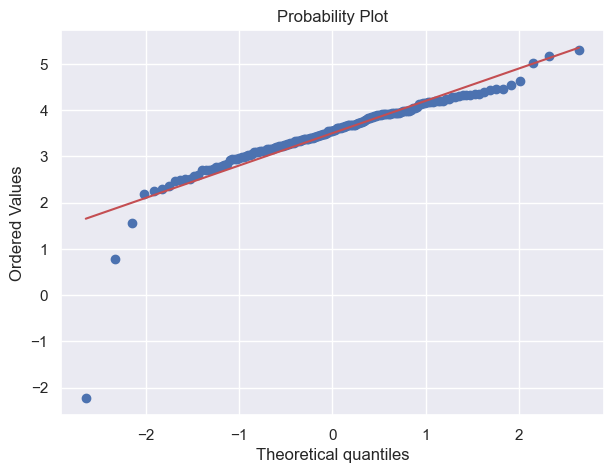

In [ ]:
logtransformation('exports',data2)

Skewness of the plot for Health: 0.7057460547100981
Kurtosis of the plot for Health: 0.6941956045730078


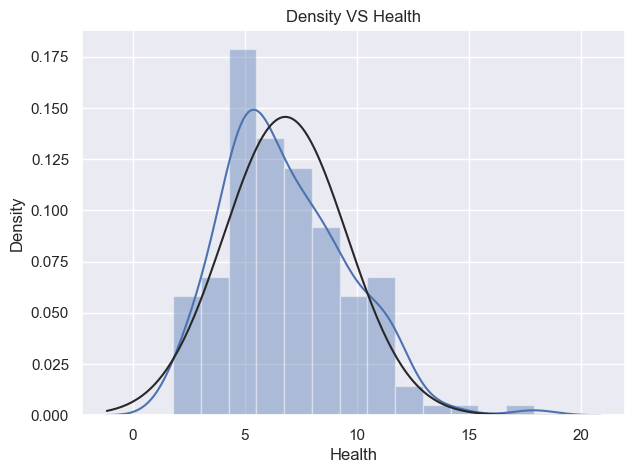

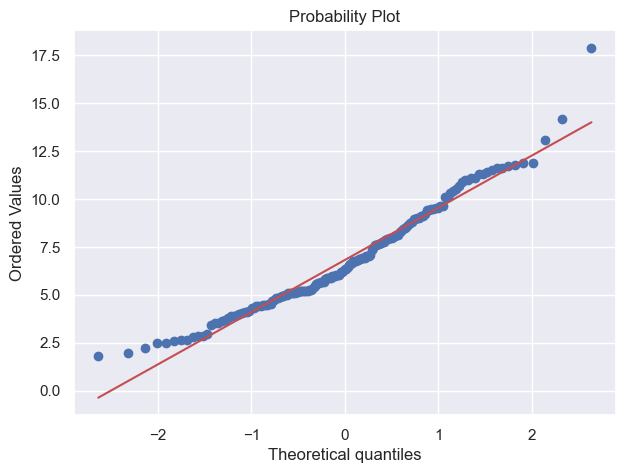

In [ ]:
densityplot('health',data3)

Skewness of the plot for Imports: 1.90527571988626
Kurtosis of the plot for Imports: 6.755854282819444


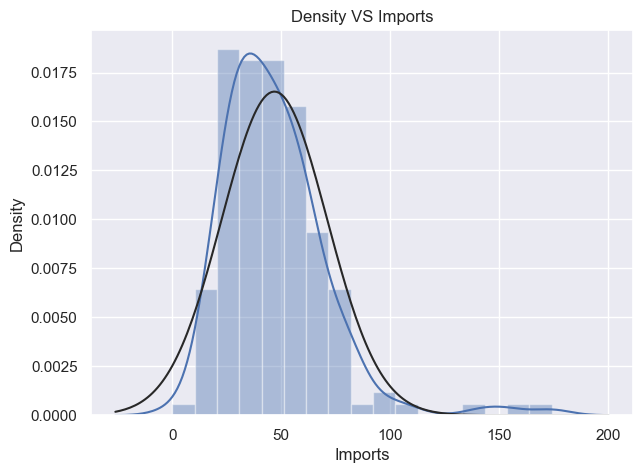

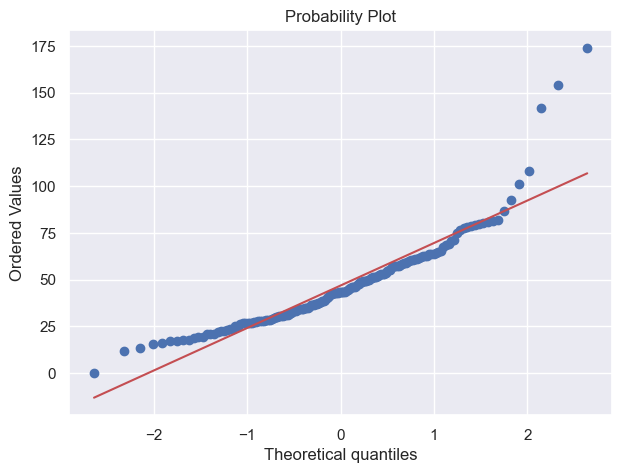

In [ ]:
densityplot('imports',data3)

Skewness of the plot for Income: 2.231479607767527
Kurtosis of the plot for Income: 7.02865707170062


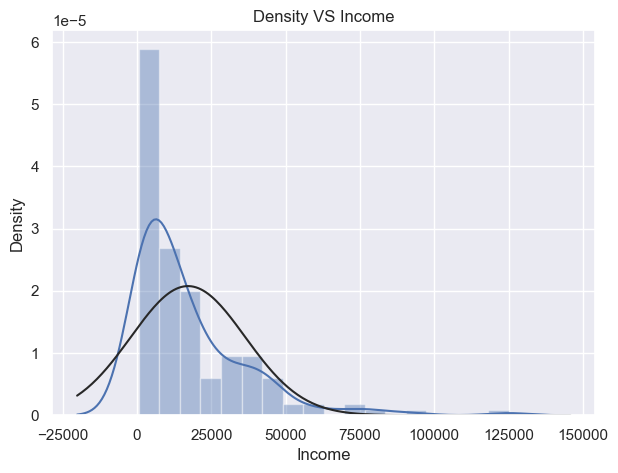

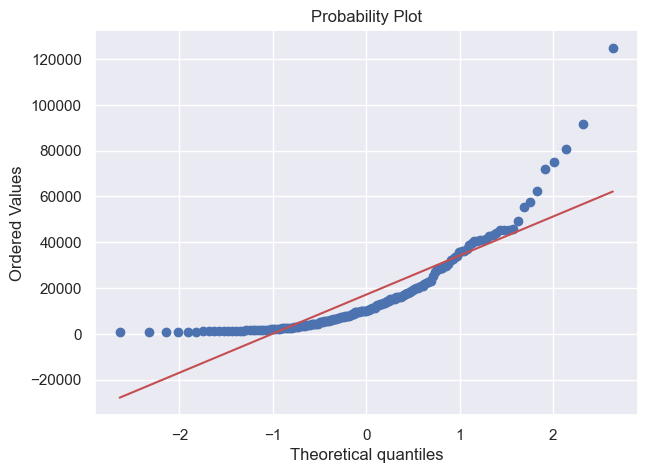

In [ ]:
densityplot('income',data3)

Skewness of the plot for Income: -0.23619123240539316
Kurtosis of the plot for Income: -0.8453772800574977


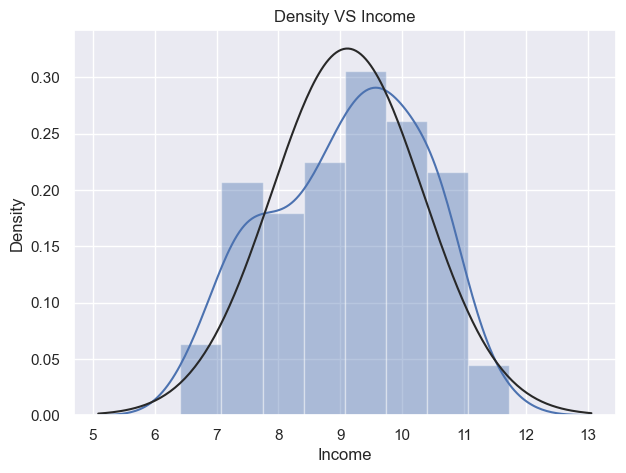

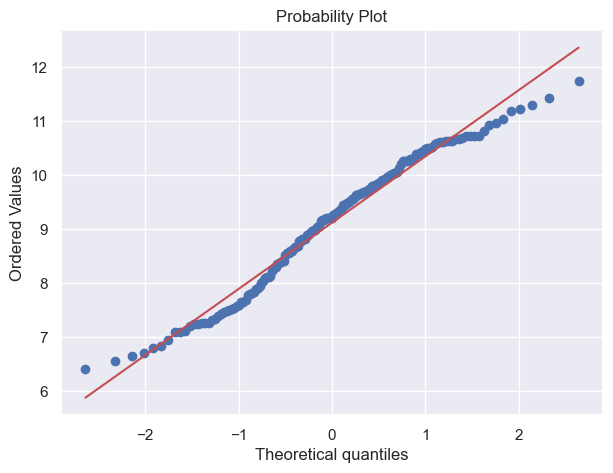

In [ ]:
logtransformation('income',data2)

Skewness of the plot for Inflation: 5.154049359697971
Kurtosis of the plot for Inflation: 41.74250190710696


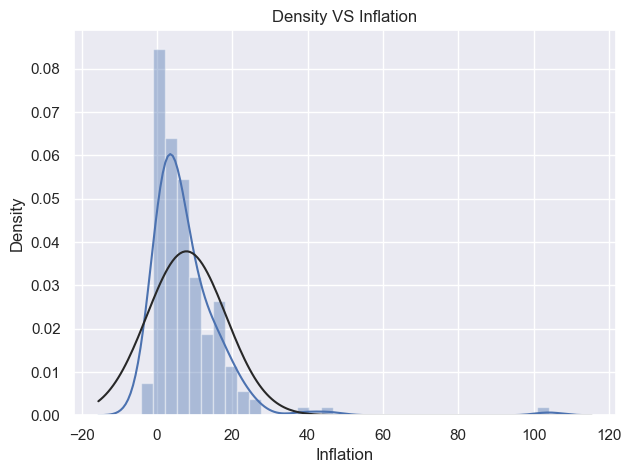

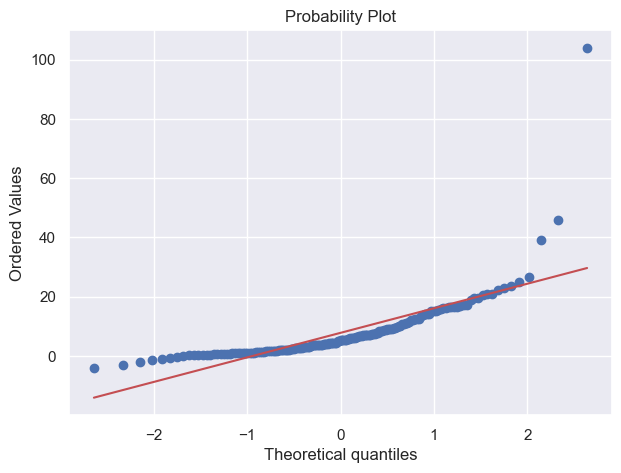

In [ ]:
densityplot('inflation',data3)

Skewness of the plot for Life_expec: -0.9709955819991258
Kurtosis of the plot for Life_expec: 1.1515912411574836


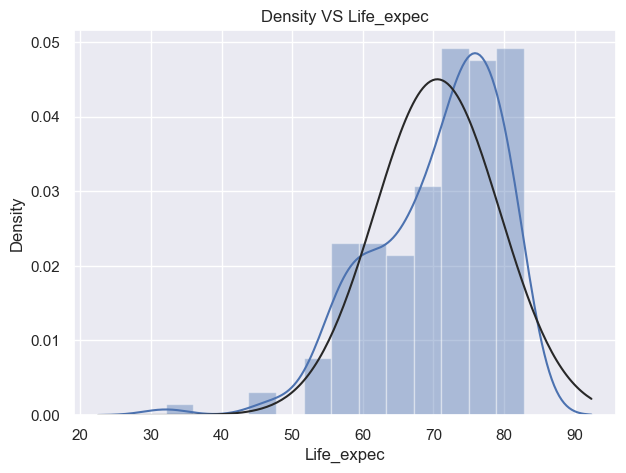

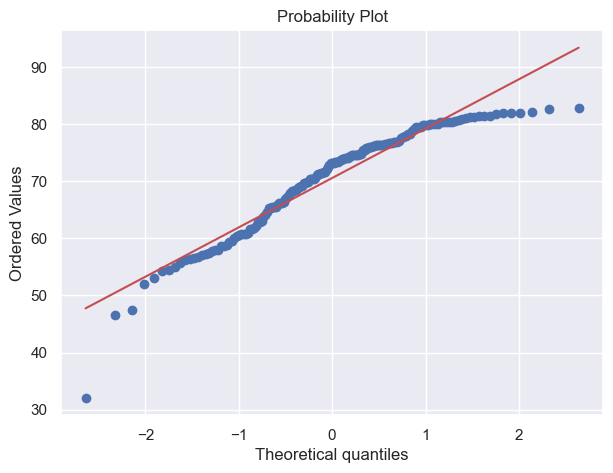

In [ ]:
densityplot('life_expec',data3)

Skewness of the plot for Total_fer: 0.9670916808050207
Kurtosis of the plot for Total_fer: -0.18677901913186368


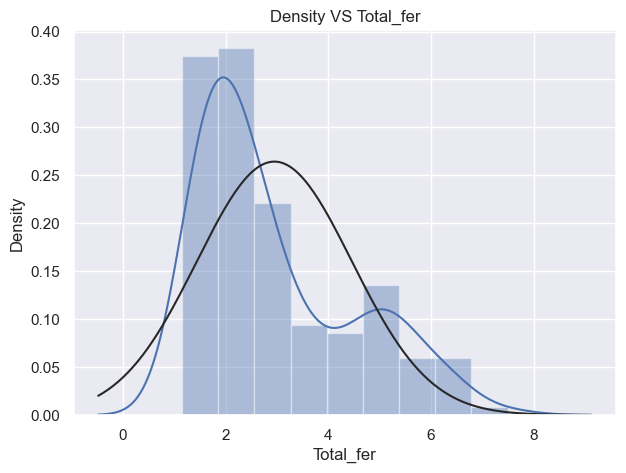

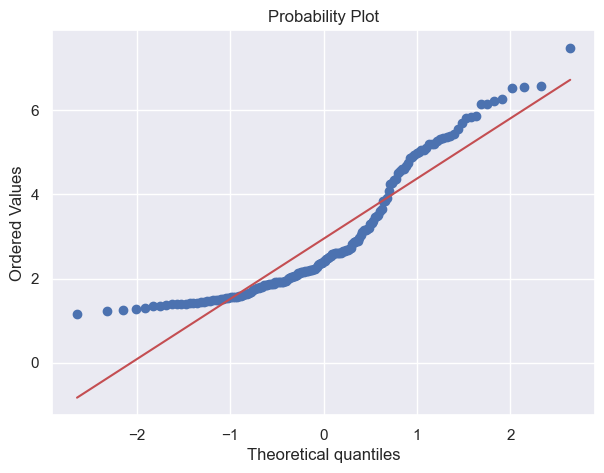

In [ ]:
densityplot('total_fer',data3)

Skewness of the plot for Total_fer: 0.38464375447188215
Kurtosis of the plot for Total_fer: -1.0113762001892268


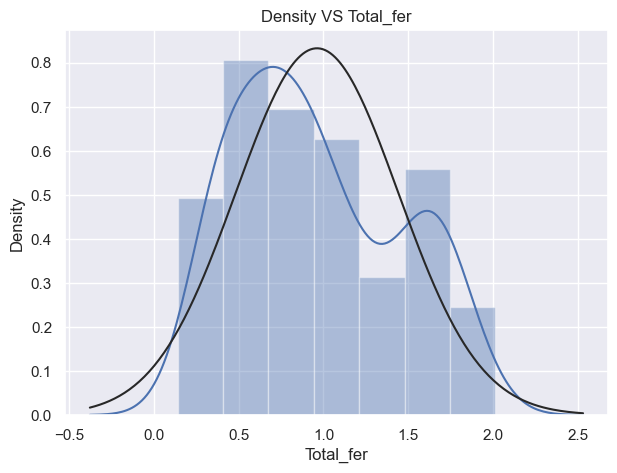

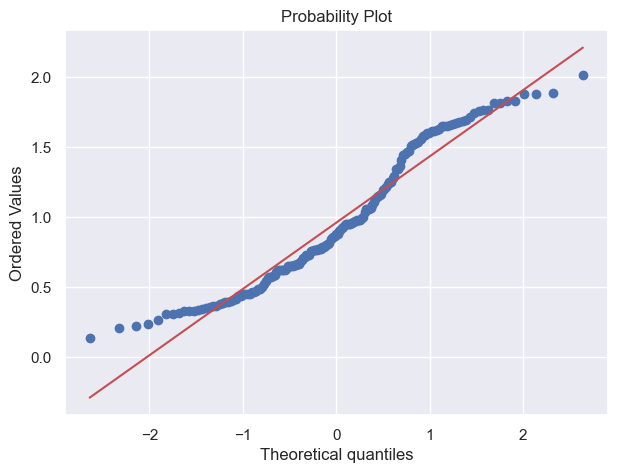

In [ ]:
logtransformation('total_fer',data2)

In [ ]:
data2

child_mort   exports  health  imports    income  inflation  life_expec  \
0      4.502029  2.302585    7.58     44.9  7.383989       9.44        56.2   
1      2.809403  3.332205    6.55     48.6  9.203316       4.49        76.3   
2      3.306887  3.648057    4.17     31.4  9.464983      16.10        76.5   
3      4.779123  4.131961    2.85     42.9  8.682708      22.40        60.1   
4      2.332144  3.817712    6.03     58.9  9.857444       1.44        76.8   
..          ...       ...     ...      ...       ...        ...         ...   
162    3.374169  3.841601    5.25     52.7  7.989560       2.62        63.0   
163    2.839078  3.349904    4.91     17.6  9.711116      45.90        75.4   
164    3.148453  4.276666    6.84     80.2  8.409608      12.10        73.1   
165    4.030695  3.401197    5.18     34.4  8.407378      23.60        67.5   
166    4.420045  3.610918    5.89     30.9  8.095599      14.00        52.0   

     total_fer      gdpp  
0     1.761300  6.315358  
1     0.500775  8.316300  
2     1.061257  8.402904  
3     1.818077  8.169053  
4     0.756122  9.409191  
..         ...       ...  
162   1.252763  7.996317  
163   0.904218  9.510445  
164   0.667829  7.177782  
165   1.541159  7.177782  
166   1.686399  7.286192  

[167 rows x 9 columns]

#

In [ ]:
data2['imports'] = minmax_scale(data2['imports'], feature_range=(0, 1),  axis=0, copy=True)
data2['inflation']=minmax_scale(data2['inflation'], feature_range=(0, 1),  axis=0, copy=True)
data2['life_expec']=minmax_scale(data2['life_expec'], feature_range=(0, 1),  axis=0, copy=True)
data2['health']=minmax_scale(data2['health'], feature_range=(0, 1),  axis=0, copy=True)
data2

child_mort   exports    health   imports    income  inflation  \
0      4.502029  2.302585  0.358608  0.257765  7.383989   0.126144   
1      2.809403  3.332205  0.294593  0.279037  9.203316   0.080399   
2      3.306887  3.648057  0.146675  0.180149  9.464983   0.187691   
3      4.779123  4.131961  0.064636  0.246266  8.682708   0.245911   
4      2.332144  3.817712  0.262275  0.338255  9.857444   0.052213   
..          ...       ...       ...       ...       ...        ...   
162    3.374169  3.841601  0.213797  0.302609  7.989560   0.063118   
163    2.839078  3.349904  0.192666  0.100809  9.711116   0.463081   
164    3.148453  4.276666  0.312617  0.460715  8.409608   0.150725   
165    4.030695  3.401197  0.209447  0.197397  8.407378   0.257000   
166    4.420045  3.610918  0.253574  0.177275  8.095599   0.168284   

     life_expec  total_fer      gdpp  
0      0.475345   1.761300  6.315358  
1      0.871795   0.500775  8.316300  
2      0.875740   1.061257  8.402904  
3      0.552268   1.818077  8.169053  
4      0.881657   0.756122  9.409191  
..          ...        ...       ...  
162    0.609467   1.252763  7.996317  
163    0.854043   0.904218  9.510445  
164    0.808679   0.667829  7.177782  
165    0.698225   1.541159  7.177782  
166    0.392505   1.686399  7.286192  

[167 rows x 9 columns]

In [ ]:
dumy=data.copy()

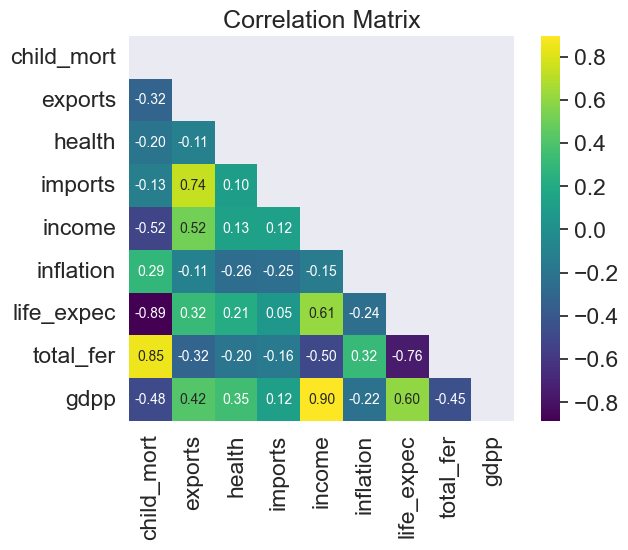

In [ ]:
cols=dumy.columns
cm = np.corrcoef(data[cols].values.T)
matrix = np.triu(cm)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values
                 ,xticklabels=cols.values,mask=matrix ,cmap='viridis')
plt.title('Correlation Matrix')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

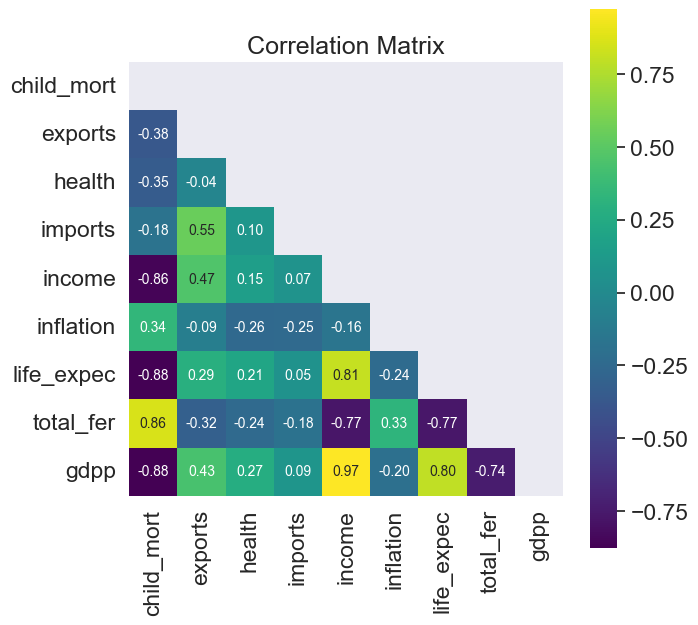

In [ ]:
cols=data2.columns
cm = np.corrcoef(data2[cols].values.T)
matrix = np.triu(cm)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values
                 ,xticklabels=cols.values,mask=matrix ,cmap='viridis')
plt.title('Correlation Matrix')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

In [ ]:
class PCA:
    def __init__(self):
        self.sorted_eig_values=[]
        self.sorted_eig_vectors=[]

    def covariance(self,X):
        n=X.shape[1] #No of features
        m=X.shape[0] #No of rows
        cov=np.zeros([n,n]) #Matrix to store the covariance
        for i in range(n):  #Nested Loop to cover all possible combination
            for j in range(n):
                l1=np.sum((X[:,i]-np.mean(X[:,i]))*(X[:,j]-np.mean(X[:,j])))  #Applying the formula of covariance
                l1=l1/(m-1)
                cov[i][j]=l1
        return cov

    def fit(self, X):
        # Compute the covariance matrix from scratch
        cov_mat = self.covariance(X)

        # Compute the eigenvalues and eigenvectors
        eig_values, eig_vectors = np.linalg.eig(cov_mat)

        # Sorting eigen values in descending order and taking index out of it.
        sorted_indices = np.argsort(eig_values)[::-1]  #[::-1] is for reversing

        #Sorted eigen values in descending order
        self.sorted_eig_values = eig_values[sorted_indices]

        #Sorted eigen vectors on the basis of eigen values
        self.sorted_eig_vectors = eig_vectors[:, sorted_indices]

    def varience_capture_by_each_component(self):
        total=np.sum(self.sorted_eig_values) # Taking total of eigen values
        temp=self.sorted_eig_values/total  # Diving each eigen values with total
        temp=np.round(temp*100,2)    # Taking percentage
        return temp

    def transform(self,X,n_component):
        #Projecting the data set on the given number of dimentionality
        principal_components=self.sorted_eig_vectors[:,:n_component]
        X_pca = np.dot(X,principal_components)
        return X_pca

In [ ]:
data['country']=names
data

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp              country  
0         5.82    553          Afghanistan  
1         1.65   4090              Albania  
2         2.89   4460              Algeria  
3         6.16   3530               Angola  
4         2.13  12200  Antigua and Barbuda  
..         ...    ...                  ...  
162       3.50   2970              Vanuatu  
163       2.47  13500            Venezuela  
164       1.95   1310              Vietnam  
165       4.67   1310                Yemen  
166       5.40   1460               Zambia  

[167 rows x 10 columns]

In [ ]:
X=data2.iloc[:,1:].to_numpy()
model=PCA()
model.fit(X)
li=model.varience_capture_by_each_component()
cumulative=np.cumsum(li)

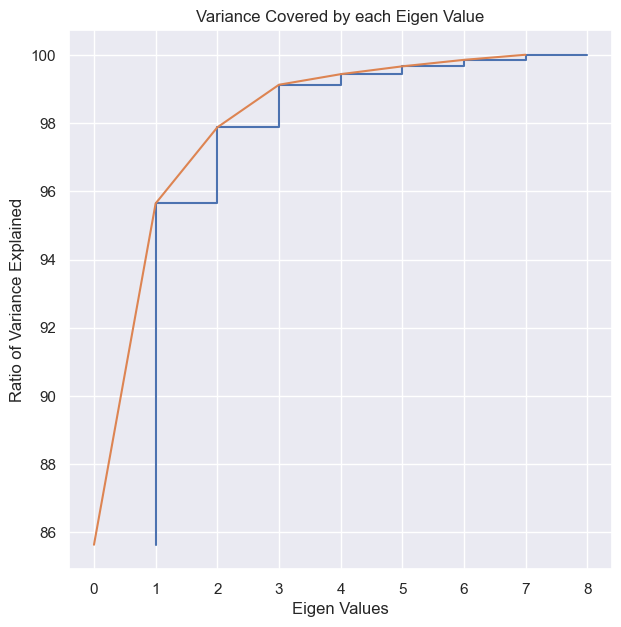

[ 85.64  95.65  97.88  99.13  99.44  99.67  99.86 100.01]


In [ ]:
plt.step(list(range(1,9)), cumulative)
plt.plot(cumulative)
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()
print(cumulative)

In [ ]:
PCA_X=model.transform(X,3)
df_PCA=pd.DataFrame(PCA_X,columns=['PC1','PC2','PC3'])
df_PCA

PC1       PC2       PC3
0    -9.347176  0.709758 -2.856568
1   -12.402108  1.141038 -2.109157
2   -12.578686  1.444327 -2.643472
3   -11.858246  2.077090 -3.388144
4   -13.660080  1.394694 -2.629335
..         ...       ...       ...
162 -11.365752  1.834643 -2.857634
163 -13.518798  0.918080 -2.867890
164 -11.222261  2.349153 -1.970937
165 -10.875989  1.531154 -2.818879
166 -10.760539  1.750834 -3.055501

[167 rows x 3 columns]

In [ ]:
PCA_X_without=data2.iloc[:,0:].to_numpy()
PCA_X_without

array([[4.50202943, 2.30258509, 0.35860783, ..., 0.47534517, 1.76130026,
        6.315358  ],
       [2.8094027 , 3.33220451, 0.29459291, ..., 0.87179487, 0.50077529,
        8.31630025],
       [3.3068867 , 3.64805746, 0.14667495, ..., 0.87573964, 1.0612565 ,
        8.40290405],
       ...,
       [3.14845336, 4.27666612, 0.31261653, ..., 0.8086785 , 0.66782937,
        7.17778242],
       [4.03069454, 3.40119738, 0.20944686, ..., 0.69822485, 1.54115907,
        7.17778242],
       [4.4200447 , 3.61091791, 0.25357365, ..., 0.39250493, 1.68639895,
        7.28619171]])

In [ ]:
class KMeans_scratch:
    def __init__(self, k, max_iter=5000):
        self.k = k
        self.max_iter = max_iter
        self.S_S_D=0
        self.centroids=[]

    def fit(self,X,centroids=[]):
        #Checking if the centroids are given or not
        if(np.size(centroids) == 0):
            no_of_col=X.shape[0]
            #Randomly selected points from the given data if centroids is not provided to us.
            #Centroids is of (row=no of columns and columns= no of cluster that we want to find)
            self.centroids = X[random.sample(range(0,no_of_col),self.k)]
        else:
            self.centroids=centroids

        #Iterating through no of times that are provided by user
        temp=np.zeros([X.shape[0],self.k])
        for i in range(self.max_iter):
            #Storing distance
            distances=[]
            # Taking single row from our data i.e the point of N-dimension
            for k in X:
                # IN distances_temp I am trying to store sum of distance for all clusters for particular row that is particular point in N-dimension space.
                distances_temp=[]
                for j in range(self.k): # Loop for all the clusters
                    dis = np.sqrt(((k - self.centroids[j])**2).sum())  # Eucledian distance in N-dimension space.
                    distances_temp.append(dis)
                distances.append(distances_temp)
            distances=np.array(distances)      # Changing to NumPy array inorder to use functions of NumPy array.
            self.labels = np.argmin(distances, axis=1)   # As my data is store in 2D, so it in row1 it is distance for All clusters , so I am leveling them on the basis index on the row that is axis=1
            for j in range(self.k):  #Loop for changing the centroids after every interation.
                self.centroids[j] = np.mean(X[self.labels == j], axis=0)  # Repacing the previous one with the mean of the clusters.
            if np.array_equal(temp,self.centroids):
                break
            temp=self.centroids
        #Total sum of square distance
        distances = cdist(X, self.centroids)
        self.S_S_D = np.sum(np.min(distances, axis=1))

    def predict(self,X):
        distances=[]
        for k in X:
            distances_temp=[]
            for j in range(self.k):
                dis = np.sqrt(((k - self.centroids[j])**2).sum())
                distances_temp.append(dis)
            distances.append(distances_temp)
        distances=np.array(distances)
        return np.argmin(distances, axis=1)

    def silhoutte_score(self,X,y_level):

        def distances_eucledian(a,b):
            return np.sqrt(np.sum((a-b)**2))

        #Calculating intra distance(distance each point with points within that cluster)
        intra_distance=[]
        # y_level=self.predict(X)
        centroids=self.centroids
        for i in range(len(X)):
            row_level = y_level[i]
            dis=distances_eucledian(X[i],centroids[row_level])
            intra_distance.append(dis)

        #Taking the mean
        intra_distance=np.array(intra_distance)
        mean_distance_intra=np.mean(intra_distance)

        # Compute nearest-cluster distances
        nearest_cluster_distances = np.full(len(X), np.inf)
        for i in range(len(X)):
            row= y_level[i]
            for j in range(self.k):
                if j != row:
                    distance = distances_eucledian(X[i],centroids[j])
                    if distance < nearest_cluster_distances[i]:
                        nearest_cluster_distances[i] = distance

        mean_distance_inter=np.mean(nearest_cluster_distances)

        # Compute silhouette score for each data point
        silhouette_scores = (mean_distance_inter - mean_distance_intra) / np.maximum(mean_distance_inter, mean_distance_intra)

        return silhouette_scores


    def Cluster_center(self):
        return self.centroids

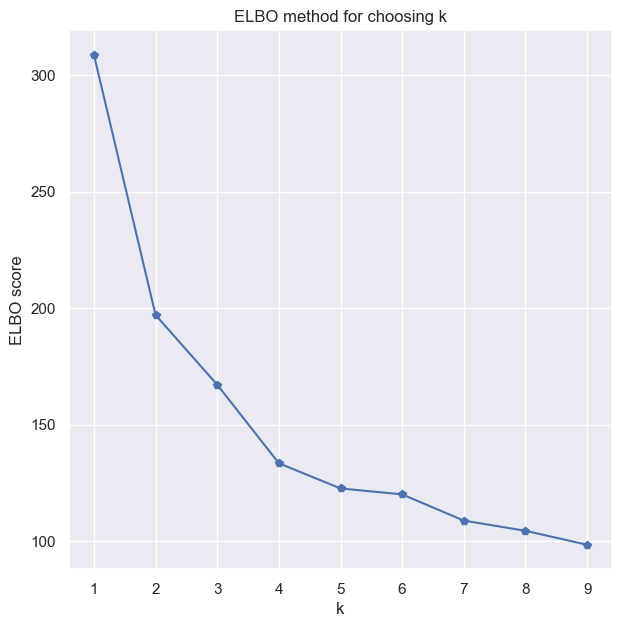

In [ ]:
k_values = np.arange(1,10)
elbo_scores = []
for k in k_values:
    kmeans = KMeans_scratch(k)
    kmeans.fit(PCA_X)
    elbo_scores.append(kmeans.S_S_D)
plt.plot(k_values, elbo_scores,marker='p')
plt.xlabel('k')
plt.ylabel('ELBO score')
plt.title('ELBO method for choosing k')
plt.show()


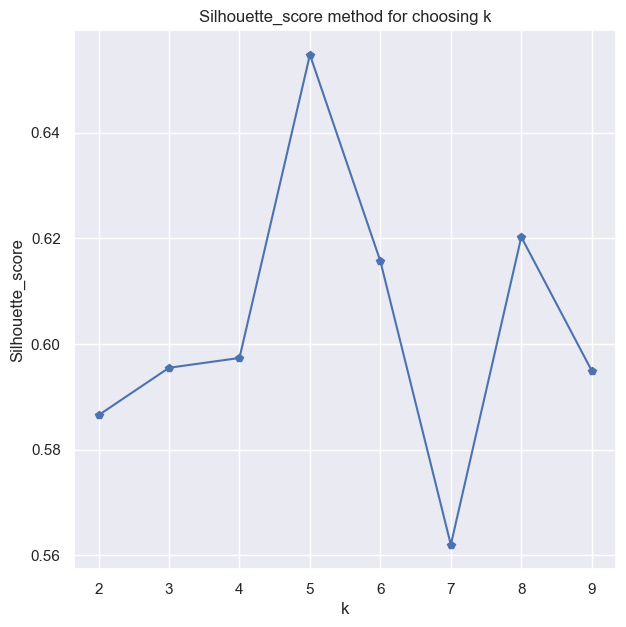

In [ ]:
sil=[]
for i in range(2,10):
    kmeans=KMeans_scratch(3)
    kmeans.fit(PCA_X)
    lev=kmeans.predict(PCA_X)
    sil.append(kmeans.silhoutte_score(PCA_X,lev))
plt.plot(range(2,10), sil,marker='p')
plt.xlabel('k')
plt.ylabel('Silhouette_score')
plt.title('Silhouette_score method for choosing k')
plt.show()

In [ ]:
kmeans=KMeans_scratch(3)
kmeans.fit(PCA_X)
lev=kmeans.predict(PCA_X)
lev

array([1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2,
       2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1,
       1, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1], dtype=int64)

# **PCA Data**

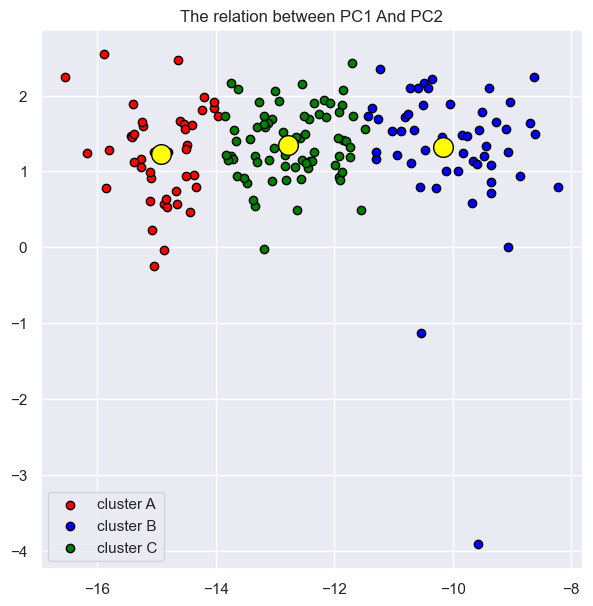

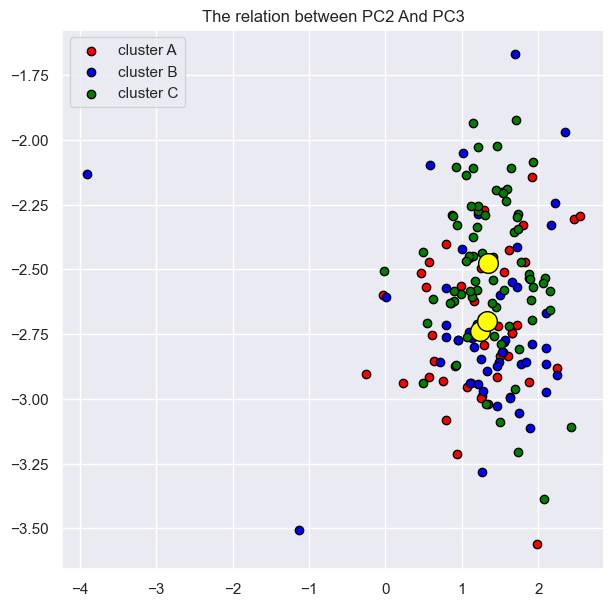

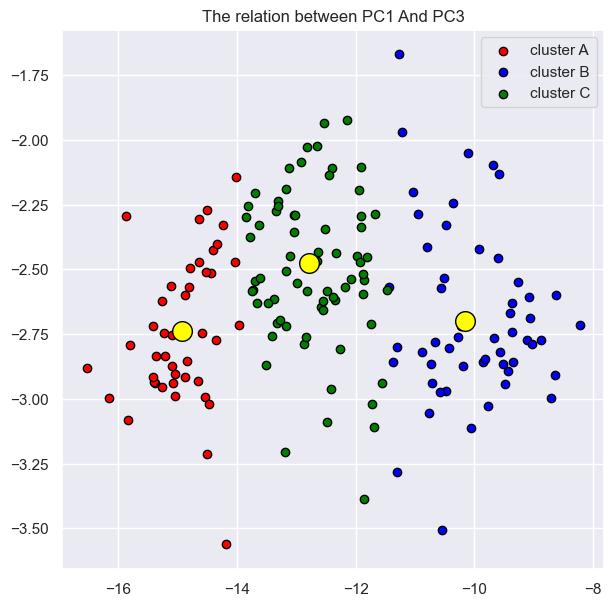

In [ ]:
def plot(a,b,i,j):
    plt.scatter(df_PCA.loc[lev==0,a],df_PCA.loc[lev==0,b],edgecolors='black',color='red',label='cluster A')
    plt.scatter(df_PCA.loc[lev==1,a],df_PCA.loc[lev==1,b],edgecolors='black',color='blue',label='cluster B')
    plt.scatter(df_PCA.loc[lev==2,a],df_PCA.loc[lev==2,b],edgecolors='black',color='green',label='cluster C')

    plt.scatter(kmeans.centroids[:,i],kmeans.centroids[:,j],c='yellow', s=200, edgecolor='black')
    plt.legend()
    plt.title("The relation between "+ str(a)+" And "+str(b))
    plt.show()

plot('PC1','PC2',0,1)
plot('PC2','PC3',1,2)
plot('PC1','PC3',0,2)

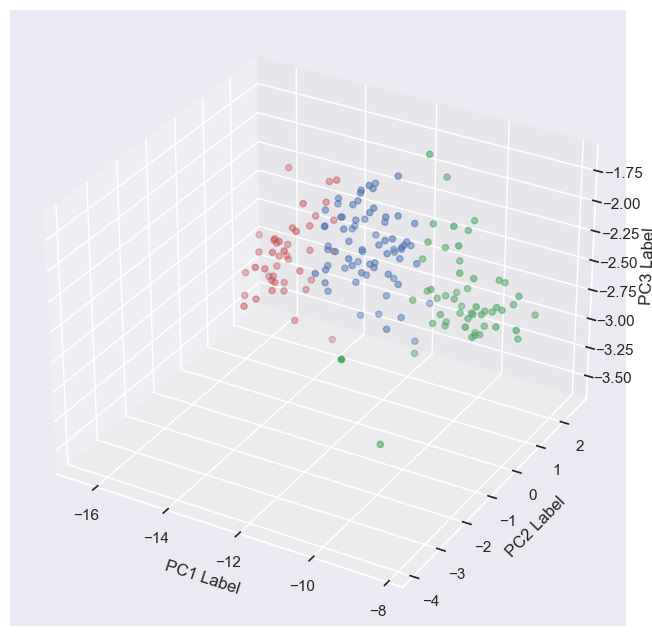

In [ ]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111, projection='3d')


colors = {0: 'r', 1: 'g', 2: 'b'}
label_colors = [colors[l] for l in lev]

# Plot the data points
ax.scatter(PCA_X[:,0], PCA_X[:,1], PCA_X[:,2], c=label_colors)

# Set the axis labels
ax.set_xlabel('PC1 Label')
ax.set_ylabel('PC2 Label')
ax.set_zlabel('PC3 Label')

# Show the plot
plt.show()

In [ ]:
def fun(col):
    dictionary = {}
    for string in col:
        key = string[0]
        if key in dictionary:
            dictionary[key].append(string)
        else:
            dictionary[key] = [string]
    for key,val in dictionary.items():
        print(f"{key}:-> {val}")

In [ ]:
print("Country in cluster A")
fun(data['country'][lev==0])

Country in cluster A
A:-> ['Australia', 'Austria']
B:-> ['Bahamas', 'Bahrain', 'Belgium', 'Brunei']
C:-> ['Canada', 'Cyprus', 'Czech Republic']
D:-> ['Denmark']
E:-> ['Equatorial Guinea', 'Estonia']
F:-> ['Finland', 'France']
G:-> ['Germany', 'Greece']
H:-> ['Hungary']
I:-> ['Iceland', 'Ireland', 'Israel', 'Italy']
J:-> ['Japan']
K:-> ['Kuwait']
L:-> ['Libya', 'Luxembourg']
M:-> ['Malta']
N:-> ['Netherlands', 'New Zealand', 'Norway']
O:-> ['Oman']
P:-> ['Portugal']
Q:-> ['Qatar']
S:-> ['Saudi Arabia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland']
U:-> ['United Arab Emirates', 'United Kingdom', 'United States']


In [ ]:
print("Country in cluster B")
fun(data['country'][lev==1])

Country in cluster B
A:-> ['Afghanistan']
B:-> ['Bangladesh', 'Benin', 'Bolivia', 'Burkina Faso', 'Burundi']
C:-> ['Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', "Cote d'Ivoire"]
E:-> ['Eritrea']
G:-> ['Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau']
H:-> ['Haiti']
I:-> ['India']
K:-> ['Kenya', 'Kiribati', 'Kyrgyz Republic']
L:-> ['Lao', 'Lesotho', 'Liberia']
M:-> ['Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Moldova', 'Mozambique', 'Myanmar']
N:-> ['Nepal', 'Niger', 'Nigeria']
P:-> ['Pakistan']
R:-> ['Rwanda']
S:-> ['Senegal', 'Sierra Leone', 'Solomon Islands', 'Sudan']
T:-> ['Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo']
U:-> ['Uganda', 'Uzbekistan']
V:-> ['Vanuatu', 'Vietnam']
Y:-> ['Yemen']
Z:-> ['Zambia']


In [ ]:
print("Country in cluster C")
fun(data['country'][lev==2])

Country in cluster C
A:-> ['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan']
B:-> ['Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria']
C:-> ['Cape Verde', 'Chile', 'China', 'Colombia', 'Congo, Rep.', 'Costa Rica', 'Croatia']
D:-> ['Dominican Republic']
E:-> ['Ecuador', 'Egypt', 'El Salvador']
F:-> ['Fiji']
G:-> ['Gabon', 'Georgia', 'Grenada', 'Guatemala', 'Guyana']
I:-> ['Indonesia', 'Iran', 'Iraq']
J:-> ['Jamaica', 'Jordan']
K:-> ['Kazakhstan']
L:-> ['Latvia', 'Lebanon', 'Lithuania']
M:-> ['Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Mongolia', 'Montenegro', 'Morocco']
N:-> ['Namibia']
P:-> ['Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland']
R:-> ['Romania', 'Russia']
S:-> ['Samoa', 'Serbia', 'Seychelles', 'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname']
T:-> ['Thailand', 'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan']
U:-> ['Ukraine', 'Uruguay']
V:-> ['

In [ ]:
def function_mean_feature(a,df_temp):
    print(f"{a}-> {np.mean(df_temp[a])}")

In [ ]:
print("For cluster A:->")
df_1=data[lev==0]
for i in column:
    function_mean_feature(i,df_1)

For cluster A:->
child_mort-> 8.35581395348837
exports-> 59.84186046511628
health-> 8.226744186046512
imports-> 51.576744186046525
income-> 43397.67441860465
inflation-> 3.9939999999999998
life_expec-> 79.00232558139534
total_fer-> 1.8932558139534885
gdpp-> 38448.83720930233


In [ ]:
print("For cluster B:->")
df_2=data[lev==1]
for i in column:
    function_mean_feature(i,df_2)

For cluster B:->
child_mort-> 82.62641509433963
exports-> 26.26790566037736
health-> 6.497358490566038
imports-> 44.563507547169806
income-> 2353.6415094339623
inflation-> 10.763867924528302
life_expec-> 61.31132075471698
total_fer-> 4.542452830188679
gdpp-> 1026.867924528302


In [ ]:
print("For cluster C:->")
df_3=data[lev==2]
for i in column:
    function_mean_feature(i,df_3)

For cluster C:->
child_mort-> 23.276056338028166
exports-> 40.84225352112677
health-> 6.198732394366198
imports-> 45.78873239436621
income-> 12286.197183098591
inflation-> 7.849845070422535
life_expec-> 72.3408450704225
total_fer-> 2.396478873239437
gdpp-> 6440.704225352113


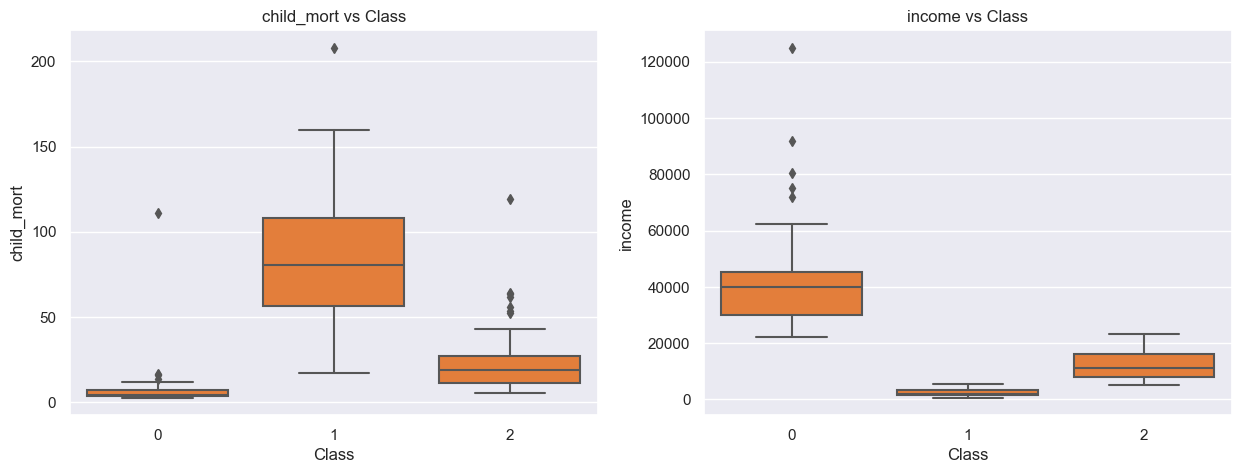


Class  1 represents  need
Class  2 represents  Might need
Class  0 represents  Do'nt need


In [ ]:
def plot_box_plot(classes, data, classNames):
  data_box_plot = pd.concat([data, pd.DataFrame(classes)], axis = 1)
  data_box_plot = data_box_plot.rename({0: 'Class'}, axis=1)

  fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

  plt.subplot(1,2,1)
  sns.boxplot(x = 'Class', y = 'child_mort', data  = data_box_plot, color = '#FF781F');
  plt.title('child_mort vs Class')

  plt.subplot(1,2,2)
  sns.boxplot(x = 'Class', y = 'income', data  = data_box_plot, color = '#FF781F');
  plt.title('income vs Class')

  plt.show()

  print()
  for cluster in classNames:
    print("Class ",cluster,"represents ",classNames[cluster])
clusterNames = {1:"need", 2:"Might need" , 0:"Do'nt need"}
plot_box_plot(lev,data,clusterNames)

### **By observing the mean value of the cluster C we can infer that it has the highest child mortality rate, lowest health facilities as well as lowest income and gdp as compared to the other clusters .So we can conclude that Cluster C is the cluster of countries which require the aid**

### **Cluster C also has child mortality rate higher than Cluster A as well as lower income , gdp , health facilities so we can conclude that cluster C countries might also need help**

### **Cluster A countries have the highest income ,gdp , health facilities , imports and exports and they have low child mortality rate so they are not in need of the aid**


In [ ]:
countries = data['country'].values
countries[countries == 'Congo, Dem. Rep.'] = 'Dem. Rep. Congo'
countries[countries == 'Congo, Rep.'] = 'Congo'
countries[countries == 'Dominican Republic'] = 'Dominican Rep.'
countries[countries == 'Equatorial Guinea'] = 'Eq. Guinea'
countries[countries == 'Kyrgyz Republic'] = 'Kyrgyzstan'
countries[countries == 'Slovak Republic'] = 'Slovakia'
countries[countries == 'United States'] = 'United States of America'
countries[countries == 'Bosnia and Herzegovina'] = 'Bosnia and Herz.'
countries[countries == 'Czech Republic'] = 'Czechia'
countries[countries == 'Solomon Islands'] = 'Solomon Is.'
countries[countries == 'Central African Republic'] = 'Central African Rep.'
countries[countries == 'Macedonia, FYR'] = 'North Macedonia'

In [ ]:
# classes is a list of size 167 haveing the clusters number deifed to each country.
# clusterNames is a dictionary mapped from custer number to the cluster name.
# countries = np.delete(countries, 3)
import geopandas
colors = ['red', 'yellow', 'black', 'purple', 'gray', 'orange', 'green']
def plot_world_map(classes, clusterNames):
  n_clusters = np.unique(classes)

  # Load the world dataset
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
  fig, ax = plt.subplots(1, figsize =(18, 12))
  ax = world[world.name != 'Antarctica'].plot(ax = ax)

  cluster_color = {}
  for idx, cluster in enumerate(clusterNames):
    cluster_color[cluster] = colors[idx]

  for country in countries:
    try:
      world[world.name == country].plot(color=cluster_color[classes[np.where(countries == country)][0]],ax=ax)
    except:
      pass

  # Add a legend
  legend_dict = {}
  for cluster in clusterNames:
    legend_dict[clusterNames[cluster]] = cluster_color[cluster]

  handles = [plt.plot([], marker="o", ls="", color=color)[0] for color in legend_dict.values()]
  labels = legend_dict.keys()
  ax.legend(handles, labels, title="Country Legend")

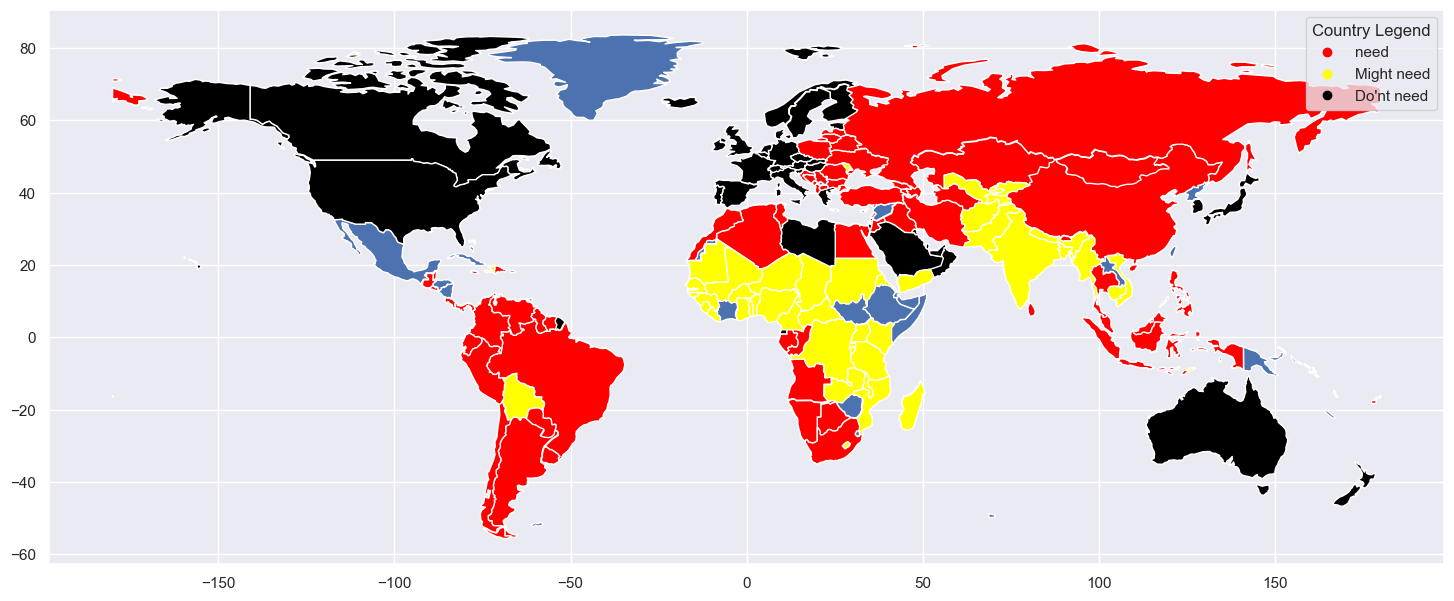

In [ ]:
clusterNames = {2:"need", 1:"Might need" , 0:"Do'nt need"}
plot_world_map(lev, clusterNames)

# Scaled Data

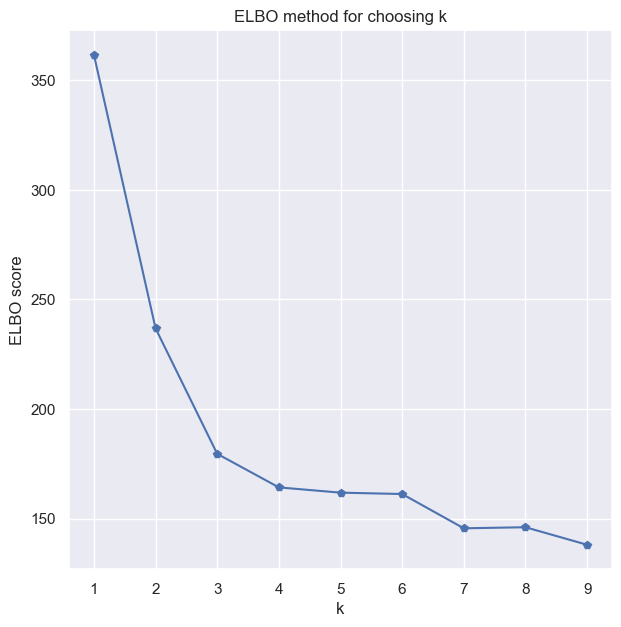

In [ ]:
k_values = np.arange(1,10)
elbo_scores = []
for k in k_values:
    kmeans = KMeans_scratch(k)
    kmeans.fit(PCA_X_without)
    elbo_scores.append(kmeans.S_S_D)
plt.plot(k_values, elbo_scores,marker='p')
plt.xlabel('k')
plt.ylabel('ELBO score')
plt.title('ELBO method for choosing k')
plt.show()

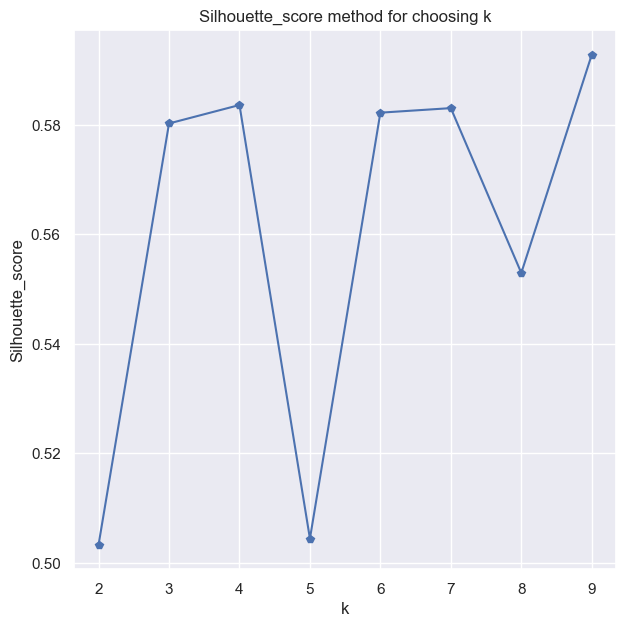

In [ ]:
sil=[]
for i in range(2,10):
    kmeans=KMeans_scratch(3)
    kmeans.fit(PCA_X_without)
    lev=kmeans.predict(PCA_X_without)
    sil.append(kmeans.silhoutte_score(PCA_X_without,lev))
plt.plot(range(2,10), sil,marker='p')
plt.xlabel('k')
plt.ylabel('Silhouette_score')
plt.title('Silhouette_score method for choosing k')
plt.show()

In [ ]:
kmeans=KMeans_scratch(3)
kmeans.fit(PCA_X_without)
lev=kmeans.predict(PCA_X_without)
lev

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2,
       2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 2, 2,
       0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0], dtype=int64)

In [ ]:
print("Country in cluster A")
fun(data['country'][lev==0])

Country in cluster A
A:-> ['Afghanistan', 'Angola']
B:-> ['Bangladesh', 'Benin', 'Bhutan', 'Bolivia', 'Burkina Faso', 'Burundi']
C:-> ['Cambodia', 'Cameroon', 'Cape Verde', 'Central African Rep.', 'Chad', 'Comoros', 'Congo', "Cote d'Ivoire"]
D:-> ['Dem. Rep. Congo']
E:-> ['Egypt', 'Eritrea']
G:-> ['Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana']
H:-> ['Haiti']
I:-> ['India', 'Indonesia']
K:-> ['Kenya', 'Kiribati', 'Kyrgyzstan']
L:-> ['Lao', 'Lesotho', 'Liberia']
M:-> ['Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar']
N:-> ['Nepal', 'Niger', 'Nigeria']
P:-> ['Pakistan', 'Philippines']
R:-> ['Rwanda']
S:-> ['Samoa', 'Senegal', 'Sierra Leone', 'Solomon Is.', 'Sudan']
T:-> ['Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Tonga']
U:-> ['Uganda', 'Uzbekistan']
V:-> ['Vanuatu', 'Vietnam']
Y:-> ['Yemen']
Z:-> ['Zambia']


In [ ]:
print("Country in cluster B")
fun(data['country'][lev==1])

Country in cluster B
A:-> ['Australia', 'Austria']
B:-> ['Bahrain', 'Belgium', 'Brunei']
C:-> ['Canada', 'Cyprus', 'Czechia']
D:-> ['Denmark']
E:-> ['Estonia']
F:-> ['Finland', 'France']
G:-> ['Germany', 'Greece']
I:-> ['Iceland', 'Ireland', 'Israel', 'Italy']
J:-> ['Japan']
K:-> ['Kuwait']
L:-> ['Luxembourg']
M:-> ['Malta']
N:-> ['Netherlands', 'New Zealand', 'Norway']
O:-> ['Oman']
P:-> ['Portugal']
Q:-> ['Qatar']
S:-> ['Singapore', 'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland']
U:-> ['United Arab Emirates', 'United Kingdom', 'United States of America']


In [ ]:
print("Country in cluster C")
fun(data['country'][lev==2])

Country in cluster C
A:-> ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan']
B:-> ['Bahamas', 'Barbados', 'Belarus', 'Belize', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Bulgaria']
C:-> ['Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia']
D:-> ['Dominican Rep.']
E:-> ['Ecuador', 'El Salvador', 'Eq. Guinea']
F:-> ['Fiji']
G:-> ['Gabon', 'Georgia', 'Grenada']
H:-> ['Hungary']
I:-> ['Iran', 'Iraq']
J:-> ['Jamaica', 'Jordan']
K:-> ['Kazakhstan']
L:-> ['Latvia', 'Lebanon', 'Libya', 'Lithuania']
N:-> ['North Macedonia', 'Namibia']
M:-> ['Malaysia', 'Maldives', 'Mauritius', 'Montenegro']
P:-> ['Panama', 'Paraguay', 'Peru', 'Poland']
R:-> ['Romania', 'Russia']
S:-> ['Saudi Arabia', 'Serbia', 'Seychelles', 'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname']
T:-> ['Thailand', 'Tunisia', 'Turkey', 'Turkmenistan']
U:-> ['Ukraine', 'Uruguay']
V:-> ['Venezuela']


In [ ]:
print("For cluster A:->")
df_1=data[lev==0]
for i in column:
    function_mean_feature(i,df_1)

For cluster A:->
child_mort-> 74.15909090909092
exports-> 28.680287878787876
health-> 6.125
imports-> 45.546453030303034
income-> 3167.469696969697
inflation-> 10.699181818181817
life_expec-> 62.7560606060606
total_fer-> 4.321818181818182
gdpp-> 1399.6060606060605


In [ ]:
print("For cluster B:->")
df_1=data[lev==1]
for i in column:
    function_mean_feature(i,df_1)

For cluster B:->
child_mort-> 5.163157894736843
exports-> 59.35263157894736
health-> 8.57578947368421
imports-> 51.67368421052631
income-> 45057.89473684211
inflation-> 2.986973684210526
life_expec-> 79.91315789473686
total_fer-> 1.7821052631578946
gdpp-> 41150.0


In [ ]:
print("For cluster C:->")
df_1=data[lev==2]
for i in column:
    function_mean_feature(i,df_1)

For cluster C:->
child_mort-> 20.64126984126984
exports-> 43.125396825396834
health-> 6.477619047619048
imports-> 45.41269841269841
income-> 14950.952380952382
inflation-> 7.617698412698412
life_expec-> 73.08253968253966
total_fer-> 2.2119047619047625
gdpp-> 8078.412698412699


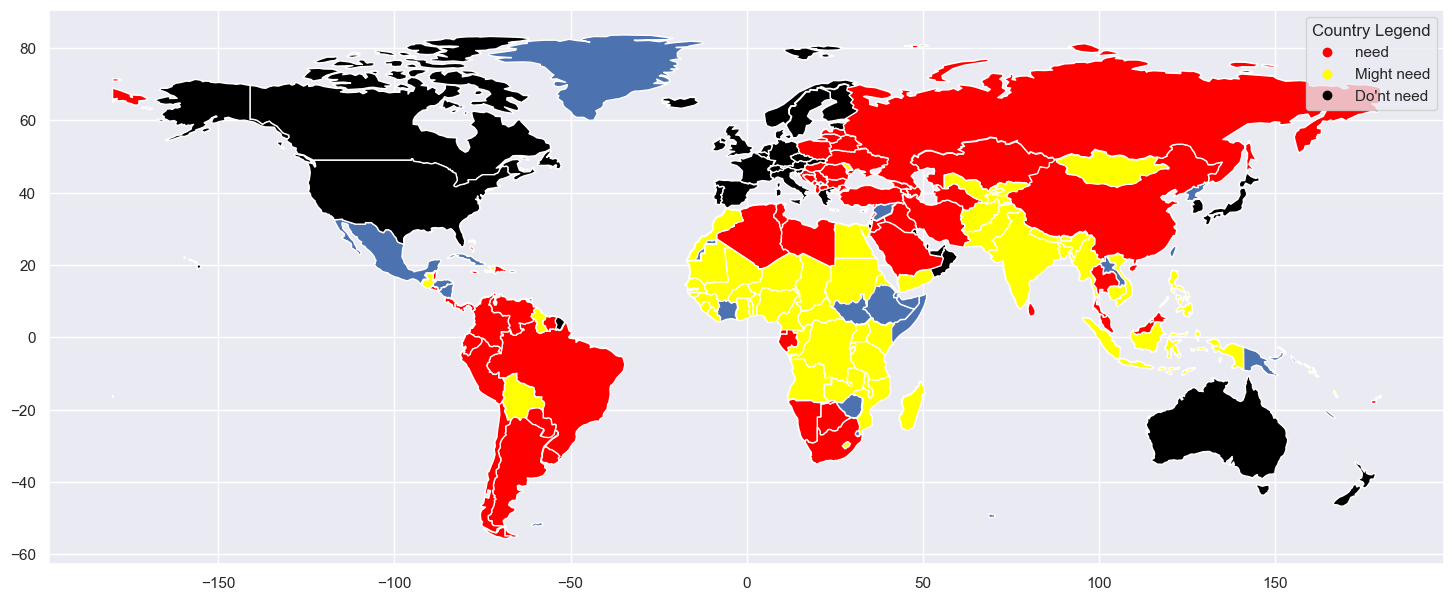

In [ ]:
clusterNames = {2:"need", 0:"Might need" , 1:"Do'nt need"}
plot_world_map(lev, clusterNames)

### **By observing the mean value of the cluster B and C we can infer that they have the highest child mortality rate, lowest health facilities as well as lowest income and gdp as compared to the other clusters .So we can conclude that Cluster B and C are the cluster of countries which require the aid**



# Applying DBSCAN

with PCA

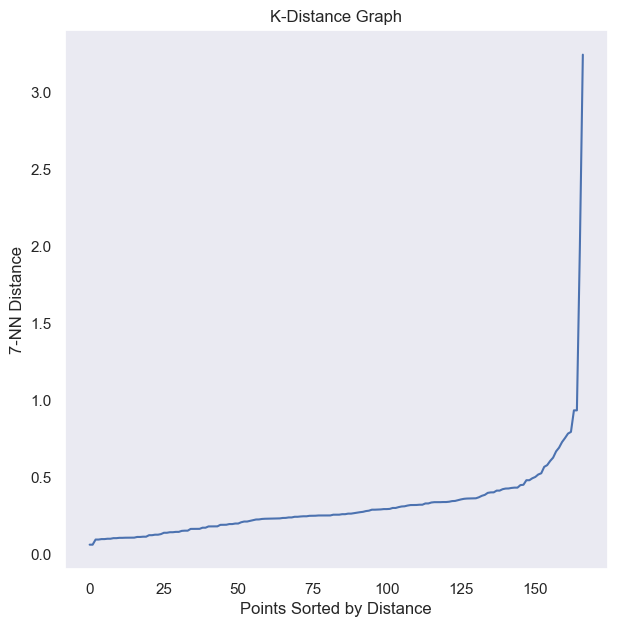

In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(PCA_X)
distances, indices = knn.kneighbors(PCA_X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph')
plt.grid()
plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5 ,min_samples=6).fit(PCA_X)
l1=clustering.labels_
print(np.unique(l1))
l1

[-1  0  1  2]


array([ 2,  0,  0, -1,  0,  0,  0,  1,  1,  0,  1,  0, -1,  0,  0,  1,  0,
        2,  0,  0,  0,  0, -1,  1,  0,  2, -1,  2,  2,  1,  0,  2, -1,  0,
        0,  0,  2, -1, -1,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0, -1, -1,
        0,  0,  1,  1,  0,  2,  0,  1,  2,  1,  0,  0,  2,  2,  0,  2,  0,
        1, -1,  0,  0,  0,  1,  1,  1,  0,  1,  0,  0,  2,  2,  1,  2,  2,
        0,  0,  2, -1,  0,  0, -1,  0,  2,  2,  0,  0,  2, -1,  2,  0,  0,
       -1,  0,  0,  0,  2, -1,  0, -1,  1,  1,  2, -1, -1,  0, -1,  0,  0,
        0,  0,  0,  1,  1,  0,  0,  2,  0, -1,  2,  0,  0,  2, -1,  0,  0,
        2,  0,  0,  1,  0,  0,  2,  0,  1,  1,  2,  2,  0, -1,  2, -1,  0,
        0,  0,  2,  0,  1,  1,  1,  0, -1,  0,  0, -1,  2,  2],
      dtype=int64)

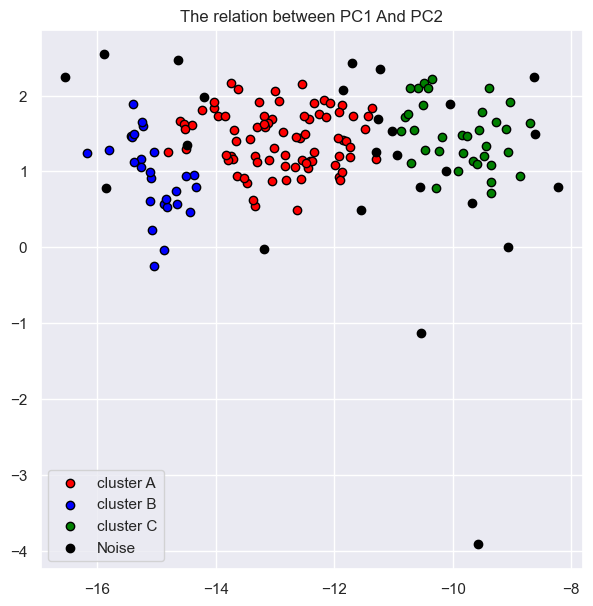

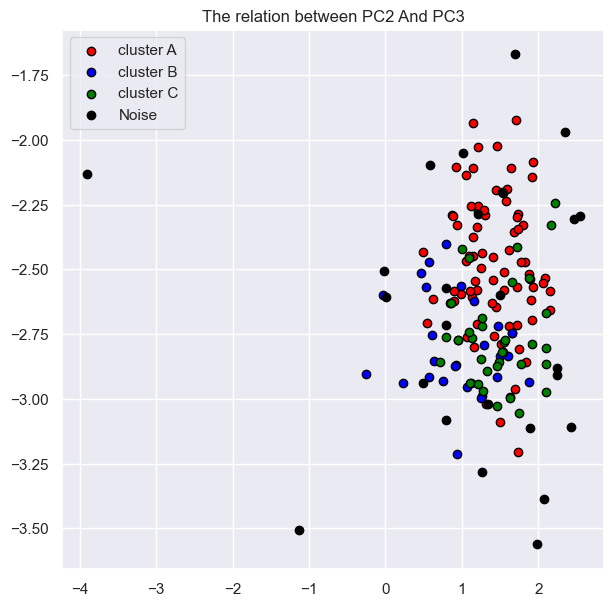

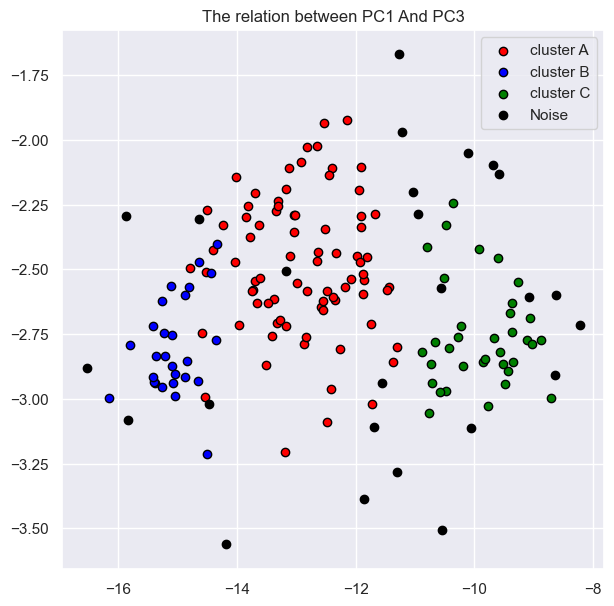

In [ ]:
def plot(a,b):
    plt.scatter(df_PCA.loc[l1==0,a],df_PCA.loc[l1==0,b],edgecolors='black',color='red',label='cluster A')
    plt.scatter(df_PCA.loc[l1==1,a],df_PCA.loc[l1==1,b],edgecolors='black',color='blue',label='cluster B')
    plt.scatter(df_PCA.loc[l1==2,a],df_PCA.loc[l1==2,b],edgecolors='black',color='green',label='cluster C')
    plt.scatter(df_PCA.loc[l1==-1,a],df_PCA.loc[l1==-1,b],edgecolors='black',color='black',label='Noise')

    plt.legend()
    plt.title("The relation between "+ str(a)+" And "+str(b))
    plt.show()

plot('PC1','PC2')
plot('PC2','PC3')
plot('PC1','PC3')

In [ ]:
print("Country in cluster A")
fun(data['country'][l1==0])

Country in cluster A
A:-> ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan']
B:-> ['Bahrain', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Bulgaria']
C:-> ['Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia']
D:-> ['Dominican Rep.']
E:-> ['Ecuador', 'Egypt', 'El Salvador', 'Estonia']
F:-> ['Fiji']
G:-> ['Gabon', 'Georgia', 'Grenada', 'Guatemala', 'Guyana']
H:-> ['Hungary']
I:-> ['Indonesia', 'Iran', 'Iraq']
J:-> ['Jamaica', 'Jordan']
K:-> ['Kazakhstan']
L:-> ['Latvia', 'Lebanon', 'Libya', 'Lithuania']
N:-> ['North Macedonia', 'Namibia']
M:-> ['Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Mongolia', 'Montenegro', 'Morocco']
O:-> ['Oman']
P:-> ['Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland']
R:-> ['Romania', 'Russia']
S:-> ['Samoa', 'Serbia', 'Seychelles', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Sri Lanka', 'St. Vincent and the Grenadines

In [ ]:
print("Country in cluster B")
fun(data['country'][l1==1])

Country in cluster B
A:-> ['Australia', 'Austria']
B:-> ['Bahamas', 'Belgium', 'Brunei']
C:-> ['Canada']
D:-> ['Denmark']
F:-> ['Finland', 'France']
G:-> ['Germany', 'Greece']
I:-> ['Iceland', 'Ireland', 'Israel', 'Italy']
J:-> ['Japan']
K:-> ['Kuwait']
N:-> ['Netherlands', 'New Zealand']
P:-> ['Portugal']
Q:-> ['Qatar']
S:-> ['Spain', 'Sweden', 'Switzerland']
U:-> ['United Arab Emirates', 'United Kingdom', 'United States of America']


In [ ]:
print("Country in cluster C")
fun(data['country'][l1==2])

Country in cluster C
A:-> ['Afghanistan']
B:-> ['Benin', 'Burkina Faso']
C:-> ['Cambodia', 'Cameroon', 'Central African Rep.', 'Comoros', "Cote d'Ivoire"]
G:-> ['Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau']
H:-> ['Haiti']
K:-> ['Kenya', 'Kiribati', 'Kyrgyzstan']
L:-> ['Lao', 'Lesotho']
M:-> ['Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique']
N:-> ['Niger']
R:-> ['Rwanda']
S:-> ['Senegal', 'Sierra Leone', 'Solomon Is.', 'Sudan']
T:-> ['Tajikistan', 'Tanzania', 'Togo']
U:-> ['Uganda']
Y:-> ['Yemen']
Z:-> ['Zambia']


In [ ]:
print("Country in cluster Noise")
fun(data['country'][l1==-1])

Country in cluster Noise
A:-> ['Angola']
B:-> ['Bangladesh', 'Brazil', 'Burundi']
C:-> ['Chad', 'Congo']
D:-> ['Dem. Rep. Congo']
E:-> ['Eq. Guinea', 'Eritrea']
I:-> ['India']
L:-> ['Liberia', 'Luxembourg']
M:-> ['Malta', 'Moldova', 'Myanmar']
N:-> ['Nepal', 'Nigeria', 'Norway']
P:-> ['Pakistan']
S:-> ['Saudi Arabia', 'Singapore']
T:-> ['Timor-Leste', 'Tonga']
U:-> ['Uzbekistan']
V:-> ['Vietnam']


In [ ]:
print("For cluster A:->")
df_1=data[l1==0]
for i in column:
    function_mean_feature(i,df_1)

For cluster A:->
child_mort-> 20.2125
exports-> 43.80625
health-> 6.362125000000001
imports-> 47.95
income-> 14511.875
inflation-> 7.0237125
life_expec-> 73.035
total_fer-> 2.2636249999999998
gdpp-> 7957.25


In [ ]:
print("For cluster B:->")
df_1=data[l1==1]
for i in column:
    function_mean_feature(i,df_1)

For cluster B:->
child_mort-> 5.492592592592592
exports-> 44.674074074074085
health-> 9.302222222222222
imports-> 38.544444444444444
income-> 45374.07407407407
inflation-> 2.657037037037037
life_expec-> 80.17037037037036
total_fer-> 1.835185185185185
gdpp-> 43107.40740740741


In [ ]:
print("For cluster B:->")
df_1=data[l1==2]
for i in column:
    function_mean_feature(i,df_1)

For cluster B:->
child_mort-> 90.80571428571429
exports-> 26.8
health-> 6.458285714285714
imports-> 45.957142857142856
income-> 2032.5714285714287
inflation-> 7.981857142857143
life_expec-> 59.28857142857142
total_fer-> 4.861142857142856
gdpp-> 839.0


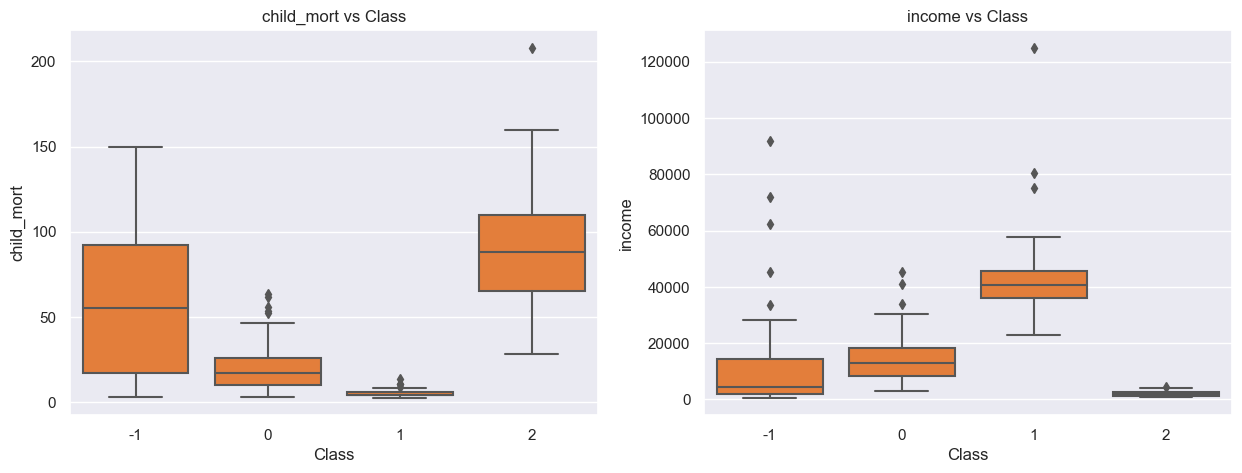


Class  2 represents  need
Class  0 represents  Might need
Class  1 represents  Do'nt need
Class  -1 represents  Noise


In [ ]:
def plot_box_plot(classes, data, classNames):
  data_box_plot = pd.concat([data, pd.DataFrame(classes)], axis = 1)
  data_box_plot = data_box_plot.rename({0: 'Class'}, axis=1)

  fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

  plt.subplot(1,2,1)
  sns.boxplot(x = 'Class', y = 'child_mort', data  = data_box_plot, color = '#FF781F');
  plt.title('child_mort vs Class')

  plt.subplot(1,2,2)
  sns.boxplot(x = 'Class', y = 'income', data  = data_box_plot, color = '#FF781F');
  plt.title('income vs Class')

  plt.show()

  print()
  for cluster in classNames:
    print("Class ",cluster,"represents ",classNames[cluster])
clusterNames = {2:"need", 0:"Might need" , 1:"Do'nt need",-1:"Noise"}
plot_box_plot(l1,data,clusterNames)

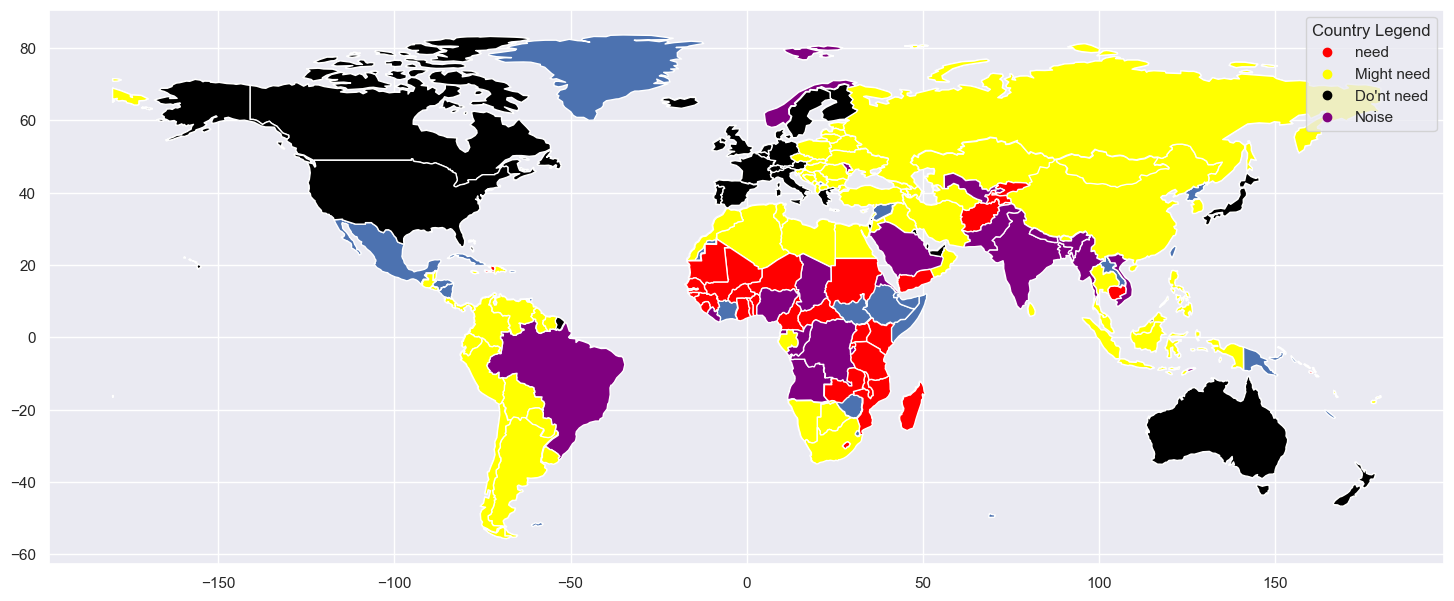

In [ ]:
clusterNames = {2:"need", 0:"Might need" , 1:"Do'nt need",-1:"Noise"}
plot_world_map(l1, clusterNames)

# **Scaled Data**

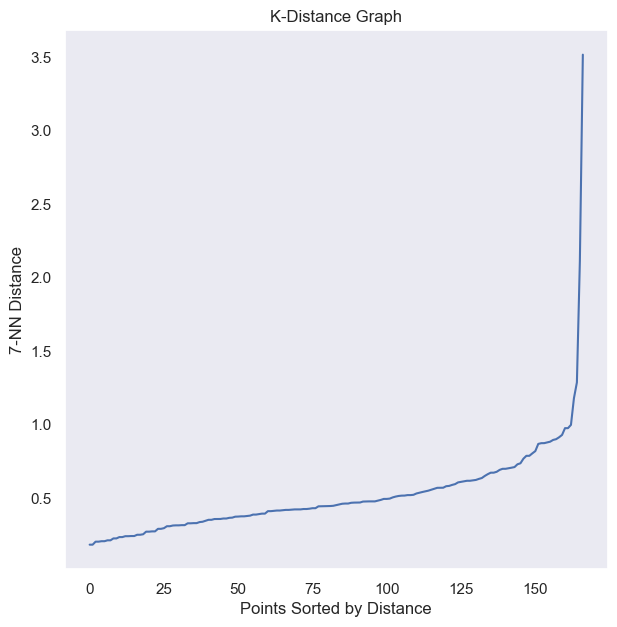

In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(PCA_X_without)
distances, indices = knn.kneighbors(PCA_X_without)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph')
plt.grid()
plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.55 ,min_samples=9).fit(PCA_X)
l1=clustering.labels_
print(np.unique(l1))
l1

[-1  0  1  2]


array([ 2,  0,  0, -1,  0,  0,  0,  1,  1,  0,  1, -1, -1,  0,  0,  1,  0,
        2,  0,  0,  0,  0, -1,  1,  0,  2, -1, -1,  2,  1,  0,  2,  2,  0,
        0,  0,  2, -1, -1,  0, -1,  0,  1,  0,  1,  0,  0,  0,  0, -1, -1,
        0,  0,  1,  1,  0,  2,  0,  1,  2, -1,  0,  0,  2,  2,  0,  2,  0,
        1, -1,  0,  0,  0,  1,  1,  1,  0, -1,  0,  0,  2,  2,  1, -1,  2,
        0,  0,  2,  2,  0,  0, -1,  0,  2,  2,  0,  0,  2, -1, -1,  0,  0,
       -1,  0,  0,  0,  2, -1,  0, -1,  1,  1,  2, -1, -1, -1, -1,  0,  0,
        0,  0,  0, -1, -1,  0,  0,  2,  0, -1,  2,  0,  0,  2, -1,  0, -1,
       -1,  0, -1,  1,  0,  0,  2,  0,  1,  1,  2,  2,  0, -1,  2, -1,  0,
        0,  0,  2,  0,  1,  1, -1,  0, -1,  0,  0, -1,  2,  2],
      dtype=int64)

In [ ]:
print("Country in cluster A")
fun(data['country'][l1==0])

Country in cluster A
A:-> ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan']
B:-> ['Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Bulgaria']
C:-> ['Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czechia']
D:-> ['Dominican Rep.']
E:-> ['Ecuador', 'Egypt', 'El Salvador', 'Estonia']
F:-> ['Fiji']
G:-> ['Gabon', 'Georgia', 'Grenada', 'Guatemala', 'Guyana']
H:-> ['Hungary']
I:-> ['Indonesia', 'Iran', 'Iraq']
J:-> ['Jamaica', 'Jordan']
K:-> ['Kazakhstan']
L:-> ['Latvia', 'Lebanon', 'Libya', 'Lithuania']
N:-> ['North Macedonia', 'Namibia']
M:-> ['Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Mongolia', 'Montenegro', 'Morocco']
P:-> ['Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland']
R:-> ['Romania', 'Russia']
S:-> ['Samoa', 'Serbia', 'Seychelles', 'Slovakia', 'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname']
T:-> ['Thailand', 'Tunisia', 'Turkey', 'Turkmen

In [ ]:
print("Country in cluster B")
fun(data['country'][l1==1])

Country in cluster B
A:-> ['Australia', 'Austria']
B:-> ['Bahamas', 'Belgium', 'Brunei']
C:-> ['Canada', 'Cyprus']
D:-> ['Denmark']
F:-> ['Finland', 'France']
G:-> ['Germany']
I:-> ['Iceland', 'Ireland', 'Israel', 'Italy']
K:-> ['Kuwait']
N:-> ['Netherlands', 'New Zealand']
S:-> ['Spain', 'Sweden', 'Switzerland']
U:-> ['United Arab Emirates', 'United Kingdom']


In [ ]:
print("Country in cluster C")
fun(data['country'][l1==2])

Country in cluster C
A:-> ['Afghanistan']
B:-> ['Benin', 'Burkina Faso']
C:-> ['Cameroon', 'Central African Rep.', 'Chad', 'Comoros']
G:-> ['Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau']
H:-> ['Haiti']
K:-> ['Kenya', 'Kiribati']
L:-> ['Lao', 'Lesotho', 'Liberia']
M:-> ['Madagascar', 'Malawi', 'Mali', 'Mozambique']
N:-> ['Niger']
R:-> ['Rwanda']
S:-> ['Senegal', 'Sierra Leone', 'Sudan']
T:-> ['Tajikistan', 'Tanzania', 'Togo']
U:-> ['Uganda']
Y:-> ['Yemen']
Z:-> ['Zambia']


In [ ]:
print("Country in Noise")
fun(data['country'][l1==-1])

Country in Noise
A:-> ['Angola']
B:-> ['Bahrain', 'Bangladesh', 'Brazil', 'Burundi']
C:-> ['Cambodia', 'Congo', "Cote d'Ivoire"]
D:-> ['Dem. Rep. Congo']
E:-> ['Eq. Guinea', 'Eritrea']
G:-> ['Greece']
I:-> ['India']
J:-> ['Japan']
K:-> ['Kyrgyzstan']
L:-> ['Luxembourg']
M:-> ['Malta', 'Mauritania', 'Moldova', 'Myanmar']
N:-> ['Nepal', 'Nigeria', 'Norway']
O:-> ['Oman']
P:-> ['Pakistan', 'Portugal']
Q:-> ['Qatar']
S:-> ['Saudi Arabia', 'Singapore', 'Slovenia', 'Solomon Is.', 'South Korea']
T:-> ['Timor-Leste', 'Tonga']
U:-> ['United States of America', 'Uzbekistan']
V:-> ['Vietnam']


In [ ]:
print("For cluster A:->")
df_1=data[l1==0]
for i in column:
    function_mean_feature(i,df_1)

For cluster A:->
child_mort-> 21.143999999999995
exports-> 42.73866666666667
health-> 6.3856
imports-> 47.69733333333333
income-> 13087.333333333334
inflation-> 7.128986666666668
life_expec-> 72.68266666666665
total_fer-> 2.2908
gdpp-> 6937.066666666667


In [ ]:
print("For cluster B:->")
df_1=data[l1==1]
for i in column:
    function_mean_feature(i,df_1)

For cluster B:->
child_mort-> 5.417391304347826
exports-> 48.46521739130435
health-> 8.98391304347826
imports-> 42.47391304347826
income-> 43169.565217391304
inflation-> 2.8753913043478256
life_expec-> 80.14347826086957
total_fer-> 1.8569565217391304
gdpp-> 42700.0


In [ ]:
print("For cluster C:->")
df_1=data[l1==2]
for i in column:
    function_mean_feature(i,df_1)

For cluster C:->
child_mort-> 97.09375
exports-> 23.05
health-> 6.6328125
imports-> 44.303125
income-> 1895.9375
inflation-> 7.71890625
life_expec-> 58.4875
total_fer-> 5.04
gdpp-> 787.90625


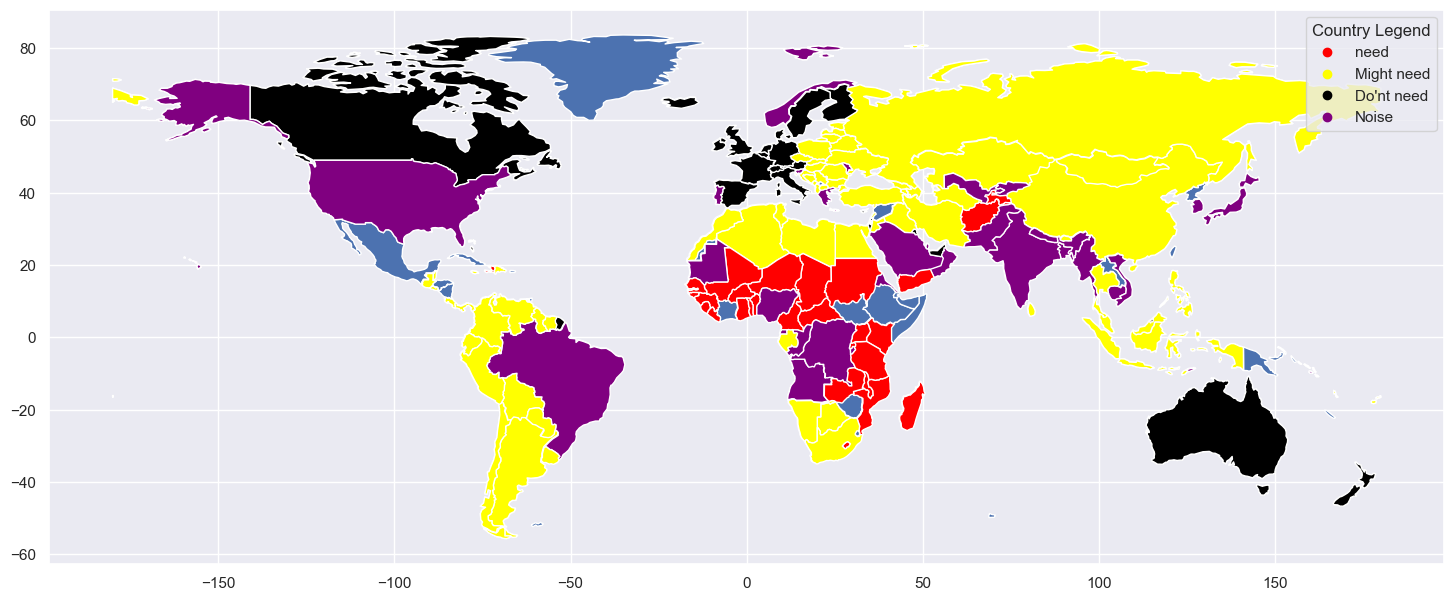

In [ ]:
clusterNames = {2:"need", 0:"Might need" , 1:"Do'nt need",-1:"Noise"}
plot_world_map(l1, clusterNames)

# Applying Hierarchical clustering

with PCA

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering1 = AgglomerativeClustering().fit(PCA_X)
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

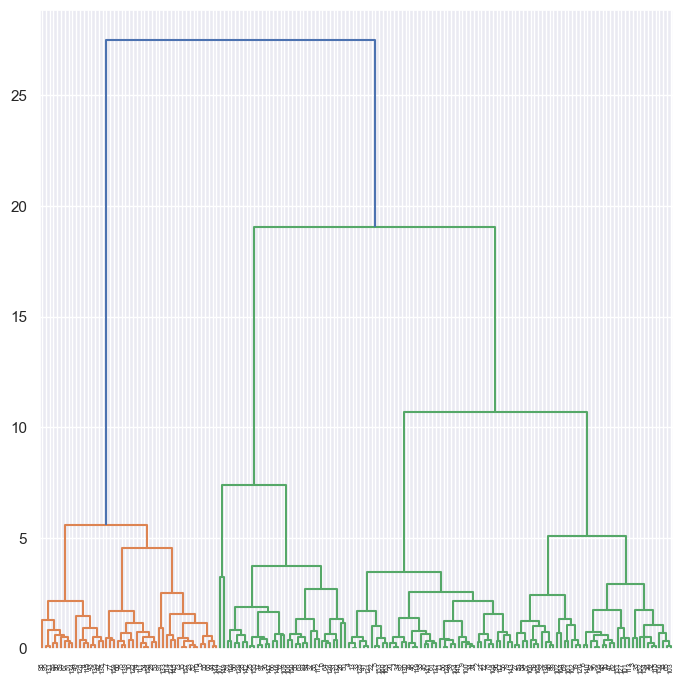

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
links= linkage(df_PCA, method = 'ward', metric = 'euclidean')
dendrogram(links)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(df_PCA)
pred_agc = pd.Series(hierarchical_cluster.labels_)
len(pred_agc.unique())
lev=pred_agc.to_numpy()
lev

array([2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0,
       2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0,
       2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

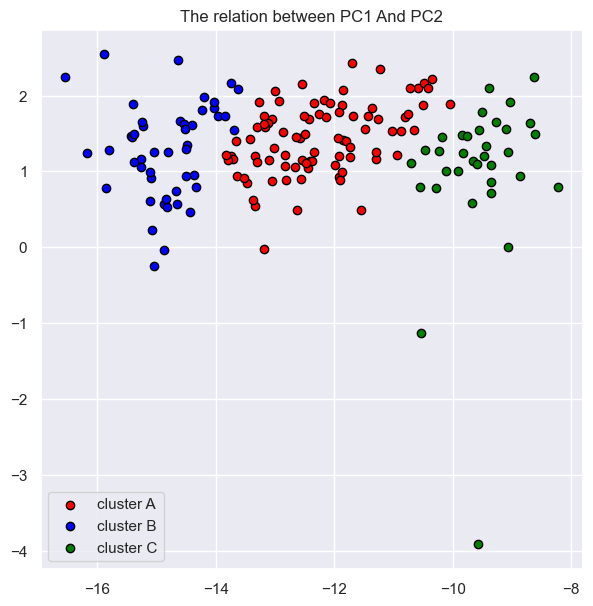

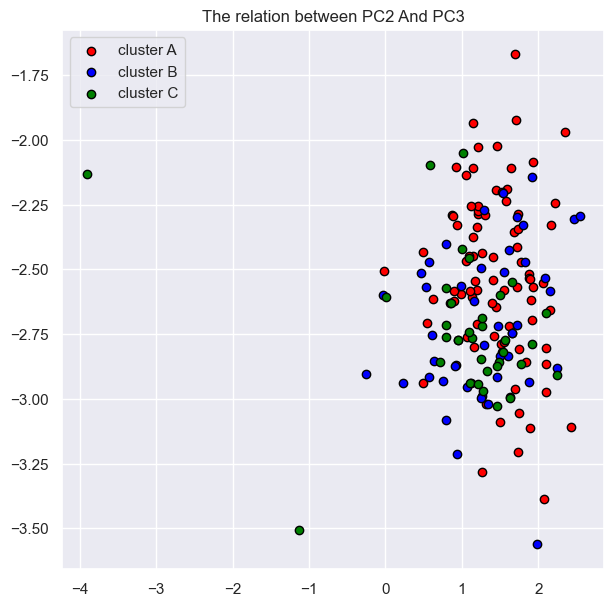

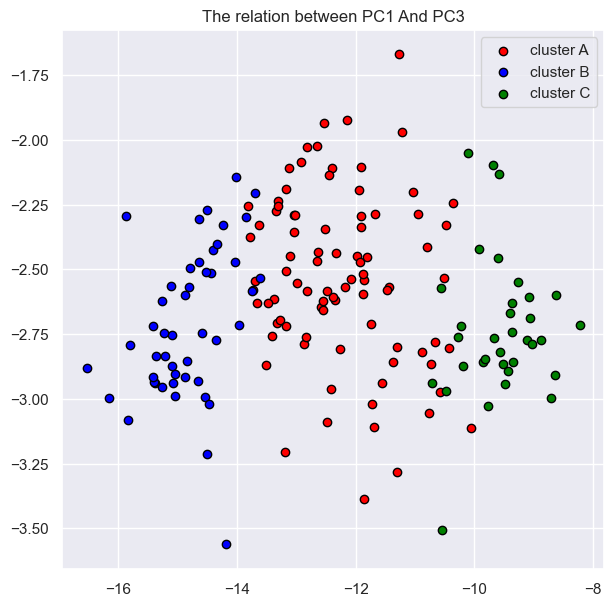

In [ ]:
def plot(a,b):
    plt.scatter(df_PCA.loc[lev==0,a],df_PCA.loc[lev==0,b],edgecolors='black',color='red',label='cluster A')
    plt.scatter(df_PCA.loc[lev==1,a],df_PCA.loc[lev==1,b],edgecolors='black',color='blue',label='cluster B')
    plt.scatter(df_PCA.loc[lev==2,a],df_PCA.loc[lev==2,b],edgecolors='black',color='green',label='cluster C')

    plt.legend()
    plt.title("The relation between "+ str(a)+" And "+str(b))
    plt.show()

plot('PC1','PC2')
plot('PC2','PC3')
plot('PC1','PC3')

In [ ]:
print("Country in cluster A")
fun(data['country'][lev==0])

Country in cluster A
A:-> ['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan']
B:-> ['Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Bulgaria']
C:-> ['Cambodia', 'Cape Verde', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia']
D:-> ['Dominican Rep.']
E:-> ['Ecuador', 'Egypt', 'El Salvador']
F:-> ['Fiji']
G:-> ['Gabon', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guyana']
I:-> ['India', 'Indonesia', 'Iran', 'Iraq']
J:-> ['Jamaica', 'Jordan']
K:-> ['Kazakhstan', 'Kyrgyzstan']
L:-> ['Lao', 'Lebanon', 'Lesotho']
N:-> ['North Macedonia', 'Namibia', 'Nigeria']
M:-> ['Maldives', 'Mauritania', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco']
P:-> ['Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland']
R:-> ['Romania', 'Russia']
S:-> ['Samoa', 'Serbia', 'Solomon Is.', 'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines', '

In [ ]:
print("Country in cluster B")
fun(data['country'][lev==1])

Country in cluster B
A:-> ['Australia', 'Austria']
B:-> ['Bahamas', 'Bahrain', 'Belgium', 'Brunei']
C:-> ['Canada', 'Cyprus', 'Czechia']
D:-> ['Denmark']
E:-> ['Eq. Guinea', 'Estonia']
F:-> ['Finland', 'France']
G:-> ['Germany', 'Greece']
H:-> ['Hungary']
I:-> ['Iceland', 'Ireland', 'Israel', 'Italy']
J:-> ['Japan']
K:-> ['Kuwait']
L:-> ['Latvia', 'Libya', 'Lithuania', 'Luxembourg']
M:-> ['Malaysia', 'Malta']
N:-> ['Netherlands', 'New Zealand', 'Norway']
O:-> ['Oman']
P:-> ['Portugal']
Q:-> ['Qatar']
S:-> ['Saudi Arabia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland']
U:-> ['United Arab Emirates', 'United Kingdom', 'United States of America']


In [ ]:
print("Country in cluster C")
fun(data['country'][lev==2])

Country in cluster C
A:-> ['Afghanistan']
B:-> ['Bangladesh', 'Benin', 'Burkina Faso', 'Burundi']
C:-> ['Cameroon', 'Central African Rep.', 'Comoros']
D:-> ['Dem. Rep. Congo']
E:-> ['Eritrea']
G:-> ['Gambia', 'Guinea', 'Guinea-Bissau']
H:-> ['Haiti']
K:-> ['Kenya', 'Kiribati']
L:-> ['Liberia']
M:-> ['Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Myanmar']
N:-> ['Nepal', 'Niger']
P:-> ['Pakistan']
R:-> ['Rwanda']
S:-> ['Senegal', 'Sierra Leone', 'Sudan']
T:-> ['Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo']
U:-> ['Uganda']


In [ ]:
print("For cluster A:->")
df_1=data[lev==0]
for i in column:
    function_mean_feature(i,df_1)

For cluster A:->
child_mort-> 33.151162790697676
exports-> 39.146511627906975
health-> 6.312441860465115
imports-> 46.294186046511626
income-> 9971.279069767443
inflation-> 9.752918604651162
life_expec-> 70.34418604651164
total_fer-> 2.732325581395348
gdpp-> 5146.430232558139


In [ ]:
print("For cluster B:->")
df_1=data[lev==1]
for i in column:
    function_mean_feature(i,df_1)

For cluster B:->
child_mort-> 8.414893617021278
exports-> 61.12553191489361
health-> 7.984255319148936
imports-> 53.59787234042554
income-> 41425.53191489362
inflation-> 3.752553191489362
life_expec-> 78.53829787234042
total_fer-> 1.884893617021277
gdpp-> 36095.10638297872


In [ ]:
print("For cluster C:->")
df_1=data[lev==2]
for i in column:
    function_mean_feature(i,df_1)

For cluster C:->
child_mort-> 92.48823529411764
exports-> 18.402911764705884
health-> 6.473235294117647
imports-> 39.12546764705883
income-> 1724.5
inflation-> 8.366029411764707
life_expec-> 60.05588235294118
total_fer-> 4.962941176470588
gdpp-> 763.2647058823529


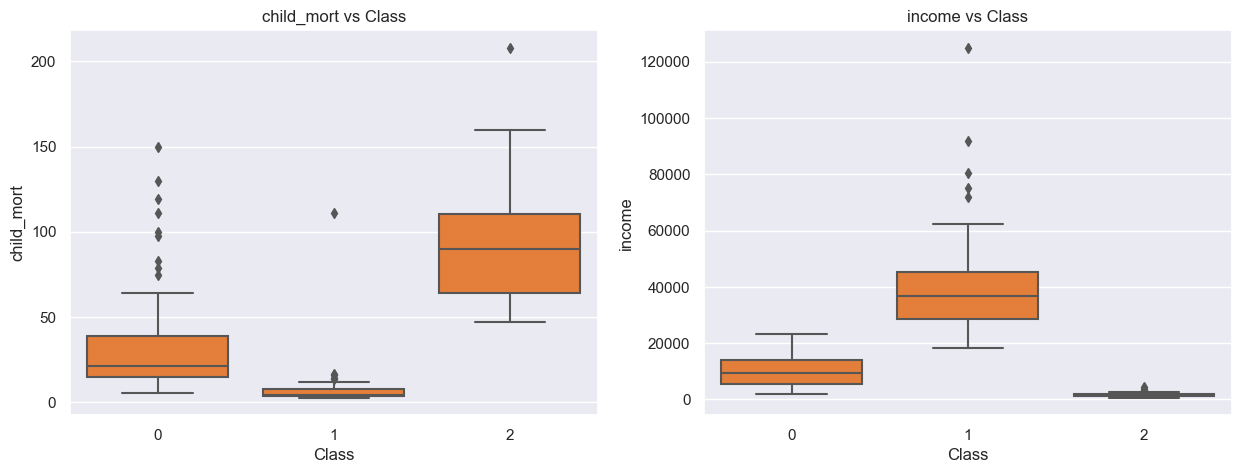


Class  2 represents  need
Class  0 represents  Might need
Class  1 represents  Do'nt need


In [ ]:
def plot_box_plot(classes, data, classNames):
  data_box_plot = pd.concat([data, pd.DataFrame(classes)], axis = 1)
  data_box_plot = data_box_plot.rename({0: 'Class'}, axis=1)

  fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

  plt.subplot(1,2,1)
  sns.boxplot(x = 'Class', y = 'child_mort', data  = data_box_plot, color = '#FF781F');
  plt.title('child_mort vs Class')

  plt.subplot(1,2,2)
  sns.boxplot(x = 'Class', y = 'income', data  = data_box_plot, color = '#FF781F');
  plt.title('income vs Class')

  plt.show()

  print()
  for cluster in classNames:
    print("Class ",cluster,"represents ",classNames[cluster])
clusterNames = {2:"need", 0:"Might need" , 1:"Do'nt need"}
plot_box_plot(lev,data,clusterNames)

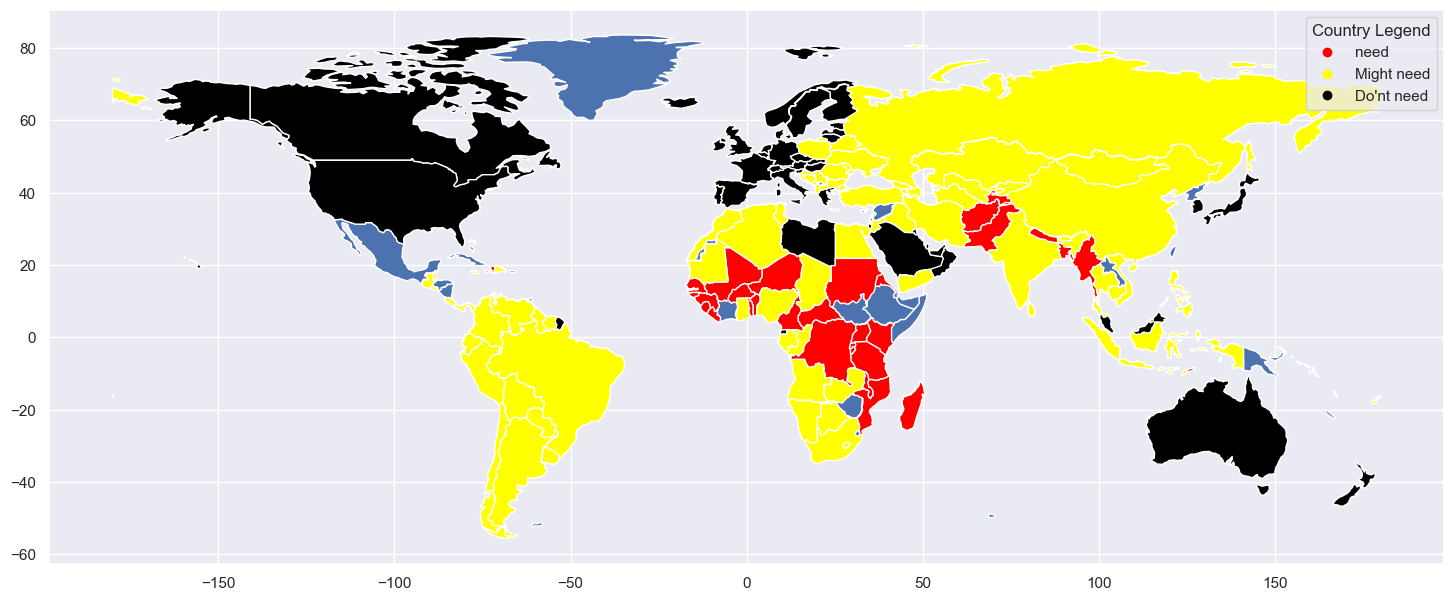

In [ ]:
clusterNames = {2:"need", 0:"Might need" , 1:"Do'nt need"}
plot_world_map(lev, clusterNames)

without PCA

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering1 = AgglomerativeClustering().fit(PCA_X_without)
clustering1.labels_

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

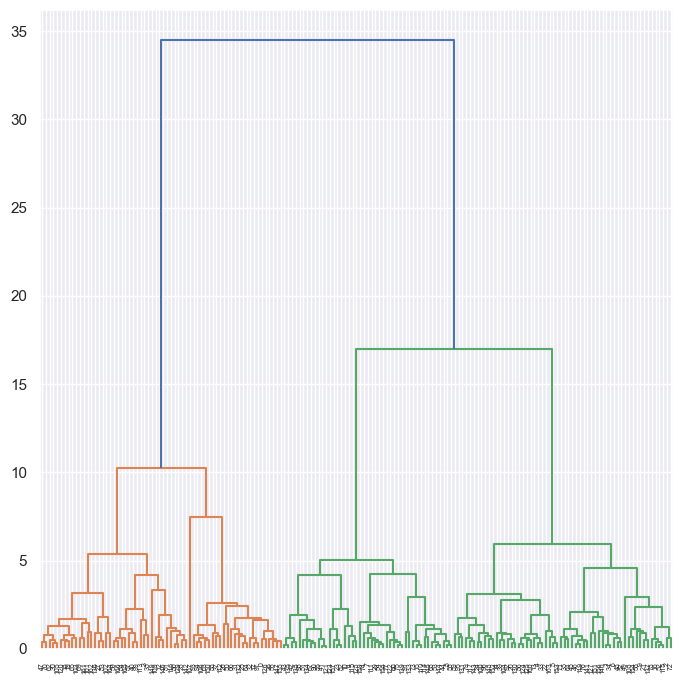

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
links= linkage(data2, method = 'ward', metric = 'euclidean')
dendrogram(links)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(data2)
pred_agc = pd.Series(hierarchical_cluster.labels_)
len(pred_agc.unique())
lev=pred_agc.to_numpy()
lev

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1,
       1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 0, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0,
       0, 1, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
print("Country in cluster A")
fun(data['country'][lev==0])

Country in cluster A
A:-> ['Afghanistan', 'Angola']
B:-> ['Bangladesh', 'Benin', 'Bhutan', 'Bolivia', 'Burkina Faso', 'Burundi']
C:-> ['Cambodia', 'Cameroon', 'Cape Verde', 'Central African Rep.', 'Chad', 'Comoros', 'Congo', "Cote d'Ivoire"]
D:-> ['Dem. Rep. Congo']
E:-> ['Egypt', 'Eritrea']
G:-> ['Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana']
H:-> ['Haiti']
I:-> ['India', 'Indonesia']
K:-> ['Kenya', 'Kiribati', 'Kyrgyzstan']
L:-> ['Lao', 'Lesotho', 'Liberia']
M:-> ['Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar']
N:-> ['Nepal', 'Niger', 'Nigeria']
P:-> ['Pakistan', 'Philippines']
R:-> ['Rwanda']
S:-> ['Senegal', 'Sierra Leone', 'Solomon Is.', 'Sudan']
T:-> ['Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo']
U:-> ['Uganda', 'Uzbekistan']
V:-> ['Vanuatu', 'Vietnam']
Y:-> ['Yemen']
Z:-> ['Zambia']


In [ ]:
print("Country in cluster B")
fun(data['country'][lev==1])

Country in cluster B
A:-> ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan']
B:-> ['Barbados', 'Belarus', 'Belize', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Bulgaria']
C:-> ['Chile', 'China', 'Colombia', 'Costa Rica']
D:-> ['Dominican Rep.']
E:-> ['Ecuador', 'El Salvador', 'Eq. Guinea']
F:-> ['Fiji']
G:-> ['Gabon', 'Georgia', 'Grenada']
I:-> ['Iran', 'Iraq']
J:-> ['Jamaica', 'Jordan']
K:-> ['Kazakhstan']
L:-> ['Lebanon', 'Libya']
N:-> ['North Macedonia', 'Namibia']
M:-> ['Malaysia', 'Maldives', 'Mauritius', 'Montenegro']
P:-> ['Panama', 'Paraguay', 'Peru']
R:-> ['Romania', 'Russia']
S:-> ['Samoa', 'Serbia', 'Seychelles', 'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname']
T:-> ['Thailand', 'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan']
U:-> ['Ukraine', 'Uruguay']
V:-> ['Venezuela']


In [ ]:
print("Country in cluster C")
fun(data['country'][lev==2])

Country in cluster C
A:-> ['Australia', 'Austria']
B:-> ['Bahamas', 'Bahrain', 'Belgium', 'Brunei']
C:-> ['Canada', 'Croatia', 'Cyprus', 'Czechia']
D:-> ['Denmark']
E:-> ['Estonia']
F:-> ['Finland', 'France']
G:-> ['Germany', 'Greece']
H:-> ['Hungary']
I:-> ['Iceland', 'Ireland', 'Israel', 'Italy']
J:-> ['Japan']
K:-> ['Kuwait']
L:-> ['Latvia', 'Lithuania', 'Luxembourg']
M:-> ['Malta']
N:-> ['Netherlands', 'New Zealand', 'Norway']
O:-> ['Oman']
P:-> ['Poland', 'Portugal']
Q:-> ['Qatar']
S:-> ['Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland']
U:-> ['United Arab Emirates', 'United Kingdom', 'United States of America']


In [ ]:
print("For cluster A:->")
df_1=data[lev==0]
for i in column:
    function_mean_feature(i,df_1)

For cluster A:->
child_mort-> 75.909375
exports-> 28.926546875
health-> 6.13609375
imports-> 45.1979046875
income-> 3104.265625
inflation-> 10.94915625
life_expec-> 62.5078125
total_fer-> 4.32796875
gdpp-> 1333.96875


In [ ]:
print("For cluster B:->")
df_1=data[lev==1]
for i in column:
    function_mean_feature(i,df_1)

For cluster B:->
child_mort-> 21.996551724137927
exports-> 41.300000000000004
health-> 6.3996551724137944
imports-> 45.15
income-> 13455.0
inflation-> 7.967741379310346
life_expec-> 72.8155172413793
total_fer-> 2.339827586206897
gdpp-> 7002.413793103448


In [ ]:
print("For cluster C:->")
df_1=data[lev==2]
for i in column:
    function_mean_feature(i,df_1)

For cluster C:->
child_mort-> 5.713333333333333
exports-> 58.188888888888876
health-> 8.318444444444443
imports-> 51.540000000000006
income-> 41868.88888888889
inflation-> 3.037577777777778
life_expec-> 79.08888888888889
total_fer-> 1.7691111111111117
gdpp-> 37188.88888888889


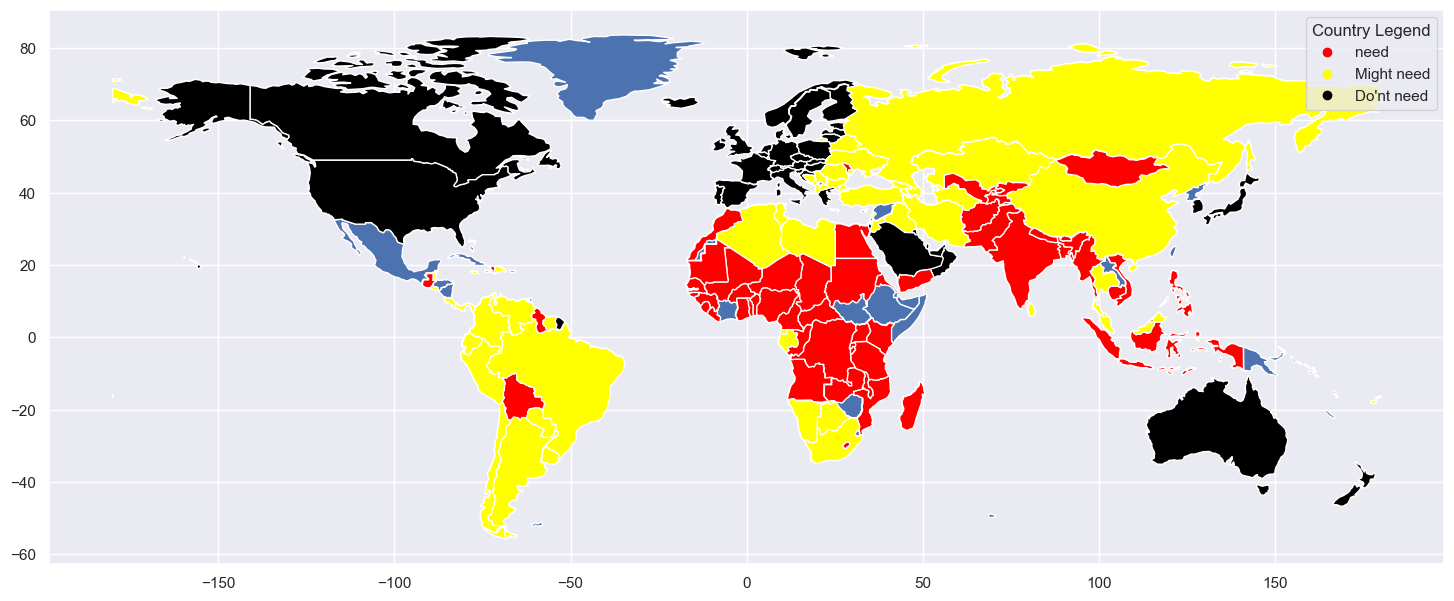

In [ ]:
clusterNames = {0:"need", 1:"Might need" , 2:"Do'nt need"}
plot_world_map(lev, clusterNames)

# Applying Spectral Clustering

with PCA

In [ ]:
clustering_3 = SpectralClustering(n_clusters=3,
        assign_labels='discretize',
        random_state=0).fit(PCA_X)
lev=clustering_3.labels_
lev

array([2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 2,
       2, 1, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0,
       2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int64)

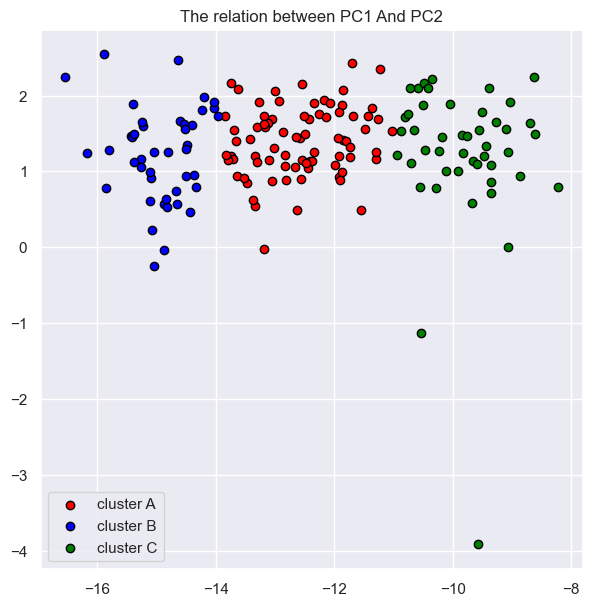

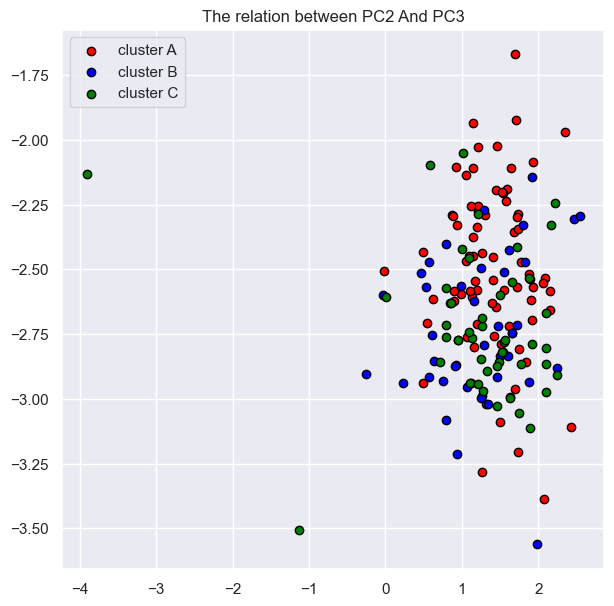

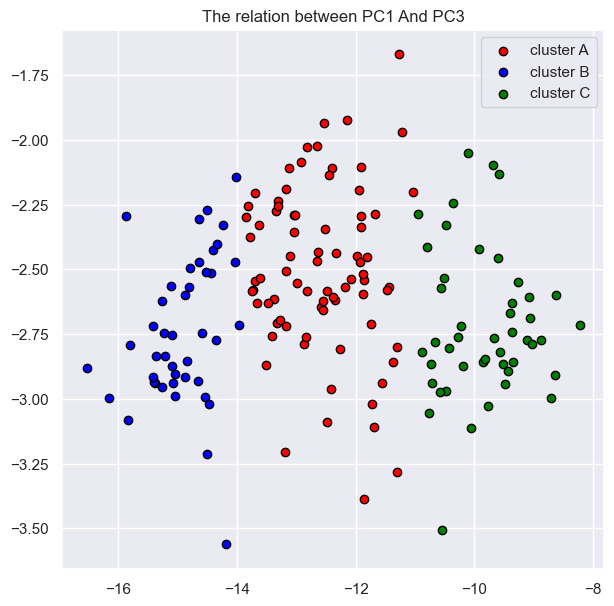

In [ ]:
def plot(a,b):
    plt.scatter(df_PCA.loc[lev==0,a],df_PCA.loc[lev==0,b],edgecolors='black',color='red',label='cluster A')
    plt.scatter(df_PCA.loc[lev==1,a],df_PCA.loc[lev==1,b],edgecolors='black',color='blue',label='cluster B')
    plt.scatter(df_PCA.loc[lev==2,a],df_PCA.loc[lev==2,b],edgecolors='black',color='green',label='cluster C')

    plt.legend()
    plt.title("The relation between "+ str(a)+" And "+str(b))
    plt.show()

plot('PC1','PC2')
plot('PC2','PC3')
plot('PC1','PC3')

In [ ]:
print("Country in cluster A")
fun(data['country'][lev==0])

Country in cluster A
A:-> ['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan']
B:-> ['Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Bulgaria']
C:-> ['Cape Verde', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia']
D:-> ['Dominican Rep.']
E:-> ['Ecuador', 'Egypt', 'El Salvador']
F:-> ['Fiji']
G:-> ['Gabon', 'Georgia', 'Grenada', 'Guatemala', 'Guyana']
I:-> ['Indonesia', 'Iran', 'Iraq']
J:-> ['Jamaica', 'Jordan']
K:-> ['Kazakhstan']
L:-> ['Latvia', 'Lebanon', 'Lithuania']
N:-> ['North Macedonia', 'Namibia', 'Nigeria']
M:-> ['Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco']
P:-> ['Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland']
R:-> ['Romania', 'Russia']
S:-> ['Samoa', 'Serbia', 'Seychelles', 'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname']
T:-> ['Thailand', 'Tonga', 'Tunisia', 'Turkey', 'Turkmen

In [ ]:
print("Country in cluster B")
fun(data['country'][lev==1])

Country in cluster B
A:-> ['Australia', 'Austria']
B:-> ['Bahamas', 'Bahrain', 'Belgium', 'Brunei']
C:-> ['Canada', 'Cyprus', 'Czechia']
D:-> ['Denmark']
E:-> ['Eq. Guinea', 'Estonia']
F:-> ['Finland', 'France']
G:-> ['Germany', 'Greece']
H:-> ['Hungary']
I:-> ['Iceland', 'Ireland', 'Israel', 'Italy']
J:-> ['Japan']
K:-> ['Kuwait']
L:-> ['Libya', 'Luxembourg']
M:-> ['Malta']
N:-> ['Netherlands', 'New Zealand', 'Norway']
O:-> ['Oman']
P:-> ['Portugal']
Q:-> ['Qatar']
S:-> ['Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland']
U:-> ['United Arab Emirates', 'United Kingdom', 'United States of America']


In [ ]:
print("Country in cluster C")
fun(data['country'][lev==2])

Country in cluster C
A:-> ['Afghanistan']
B:-> ['Bangladesh', 'Benin', 'Burkina Faso', 'Burundi']
C:-> ['Cambodia', 'Cameroon', 'Central African Rep.', 'Chad', 'Comoros', "Cote d'Ivoire"]
D:-> ['Dem. Rep. Congo']
E:-> ['Eritrea']
G:-> ['Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau']
H:-> ['Haiti']
I:-> ['India']
K:-> ['Kenya', 'Kiribati', 'Kyrgyzstan']
L:-> ['Lao', 'Lesotho', 'Liberia']
M:-> ['Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar']
N:-> ['Nepal', 'Niger']
P:-> ['Pakistan']
R:-> ['Rwanda']
S:-> ['Senegal', 'Sierra Leone', 'Solomon Is.', 'Sudan']
T:-> ['Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo']
U:-> ['Uganda']
Y:-> ['Yemen']
Z:-> ['Zambia']


In [ ]:
print("For cluster A:->")
df_1=data[lev==0]
for i in column:
    function_mean_feature(i,df_1)

For cluster A:->
child_mort-> 25.323076923076922
exports-> 40.76025641025641
health-> 6.331025641025642
imports-> 46.45641025641025
income-> 11561.666666666666
inflation-> 9.18255128205128
life_expec-> 71.90128205128204
total_fer-> 2.457820512820513
gdpp-> 6048.076923076923


In [ ]:
print("For cluster B:->")
df_1=data[lev==1]
for i in column:
    function_mean_feature(i,df_1)

For cluster B:->
child_mort-> 8.35581395348837
exports-> 59.84186046511628
health-> 8.226744186046512
imports-> 51.576744186046525
income-> 43397.67441860465
inflation-> 3.9939999999999998
life_expec-> 79.00232558139534
total_fer-> 1.8932558139534885
gdpp-> 38448.83720930233


In [ ]:
print("For cluster C:->")
df_1=data[lev==2]
for i in column:
    function_mean_feature(i,df_1)

For cluster C:->
child_mort-> 88.18695652173913
exports-> 24.189108695652177
health-> 6.318478260869563
imports-> 43.24491086956522
income-> 2070.717391304348
inflation-> 8.947500000000002
life_expec-> 60.37826086956522
total_fer-> 4.765
gdpp-> 868.7826086956521


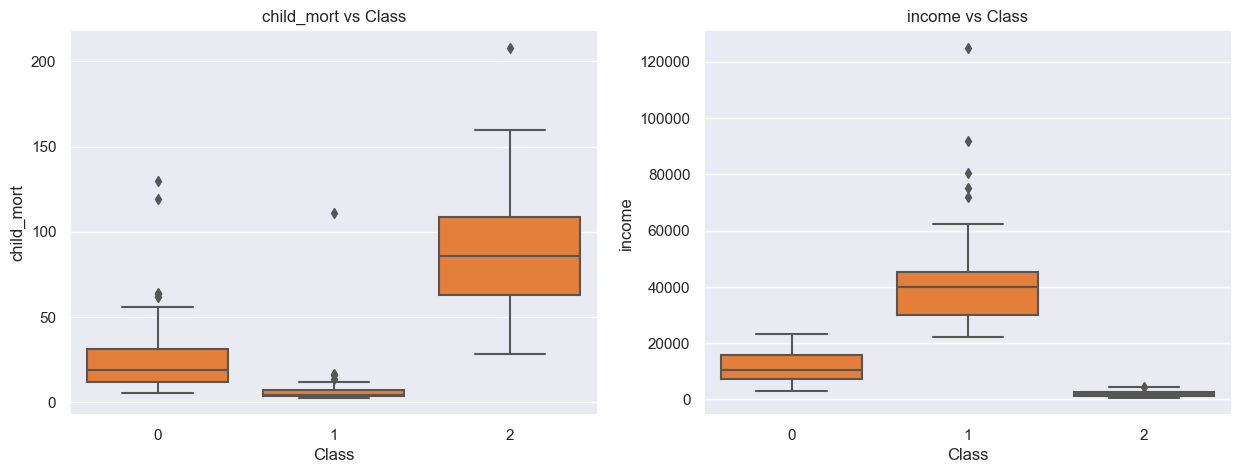


Class  2 represents  need
Class  0 represents  Might need
Class  1 represents  Do'nt need


In [ ]:
def plot_box_plot(classes, data, classNames):
  data_box_plot = pd.concat([data, pd.DataFrame(classes)], axis = 1)
  data_box_plot = data_box_plot.rename({0: 'Class'}, axis=1)

  fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

  plt.subplot(1,2,1)
  sns.boxplot(x = 'Class', y = 'child_mort', data  = data_box_plot, color = '#FF781F');
  plt.title('child_mort vs Class')

  plt.subplot(1,2,2)
  sns.boxplot(x = 'Class', y = 'income', data  = data_box_plot, color = '#FF781F');
  plt.title('income vs Class')

  plt.show()

  print()
  for cluster in classNames:
    print("Class ",cluster,"represents ",classNames[cluster])
clusterNames = {2:"need", 0:"Might need" , 1:"Do'nt need"}
plot_box_plot(lev,data,clusterNames)

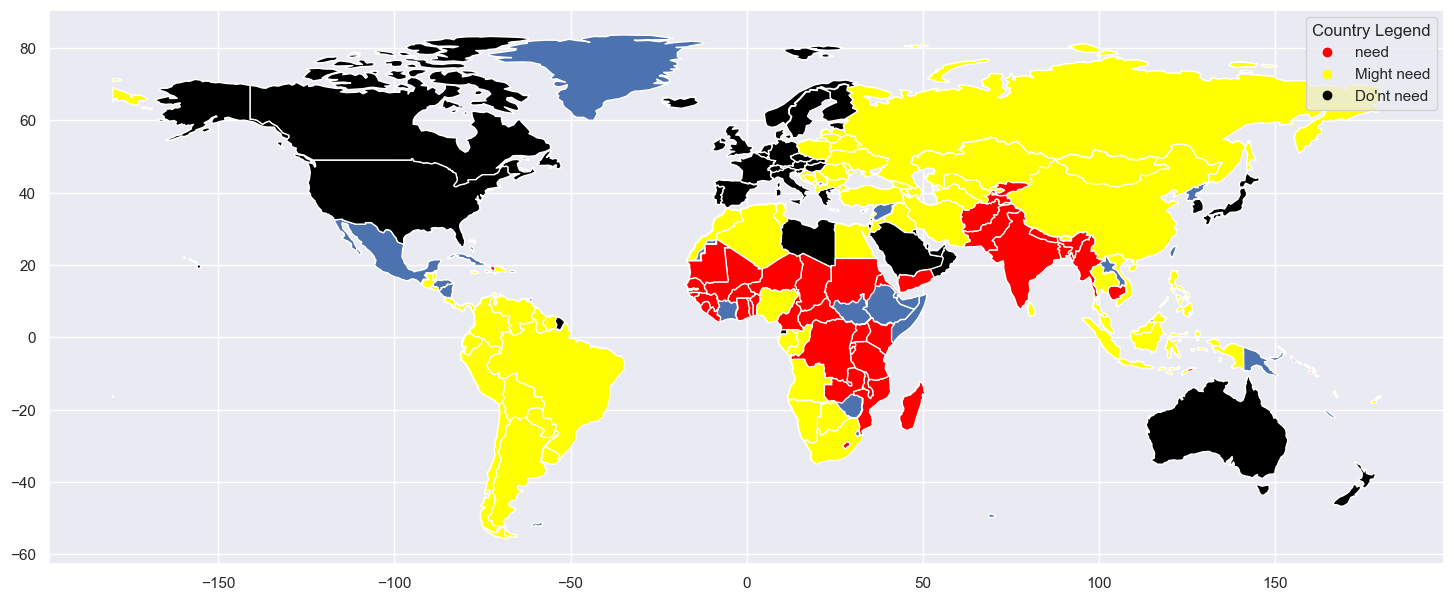

In [ ]:
clusterNames = {2:"need", 0:"Might need" , 1:"Do'nt need"}
plot_world_map(lev, clusterNames)

without PCA

In [ ]:
clustering_3 = SpectralClustering(n_clusters=3,
        assign_labels='discretize',
        random_state=0).fit(PCA_X_without)
lev=clustering_3.labels_
lev

array([2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 2,
       2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0,
       2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int64)

In [ ]:
print("Country in cluster A")
fun(data['country'][lev==0])

Country in cluster A
A:-> ['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan']
B:-> ['Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Bulgaria']
C:-> ['Cape Verde', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica']
D:-> ['Dominican Rep.']
E:-> ['Ecuador', 'Egypt', 'El Salvador', 'Eq. Guinea']
F:-> ['Fiji']
G:-> ['Gabon', 'Georgia', 'Grenada', 'Guatemala', 'Guyana']
I:-> ['Indonesia', 'Iran', 'Iraq']
J:-> ['Jamaica', 'Jordan']
K:-> ['Kazakhstan']
L:-> ['Latvia', 'Lebanon', 'Libya']
N:-> ['North Macedonia', 'Namibia']
M:-> ['Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco']
P:-> ['Panama', 'Paraguay', 'Peru', 'Philippines']
R:-> ['Romania', 'Russia']
S:-> ['Samoa', 'Serbia', 'Seychelles', 'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname']
T:-> ['Thailand', 'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan']
U:-> ['Ukraine

In [ ]:
print("Country in cluster B")
fun(data['country'][lev==1])

Country in cluster B
A:-> ['Australia', 'Austria']
B:-> ['Bahamas', 'Bahrain', 'Belgium', 'Brunei']
C:-> ['Canada', 'Croatia', 'Cyprus', 'Czechia']
D:-> ['Denmark']
E:-> ['Estonia']
F:-> ['Finland', 'France']
G:-> ['Germany', 'Greece']
H:-> ['Hungary']
I:-> ['Iceland', 'Ireland', 'Israel', 'Italy']
J:-> ['Japan']
K:-> ['Kuwait']
L:-> ['Lithuania', 'Luxembourg']
M:-> ['Malta']
N:-> ['Netherlands', 'New Zealand', 'Norway']
O:-> ['Oman']
P:-> ['Poland', 'Portugal']
Q:-> ['Qatar']
S:-> ['Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland']
U:-> ['United Arab Emirates', 'United Kingdom', 'United States of America']


In [ ]:
print("Country in cluster C")
fun(data['country'][lev==2])

Country in cluster C
A:-> ['Afghanistan']
B:-> ['Bangladesh', 'Benin', 'Burkina Faso', 'Burundi']
C:-> ['Cambodia', 'Cameroon', 'Central African Rep.', 'Chad', 'Comoros', "Cote d'Ivoire"]
D:-> ['Dem. Rep. Congo']
E:-> ['Eritrea']
G:-> ['Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau']
H:-> ['Haiti']
I:-> ['India']
K:-> ['Kenya', 'Kiribati', 'Kyrgyzstan']
L:-> ['Lao', 'Lesotho', 'Liberia']
M:-> ['Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar']
N:-> ['Nepal', 'Niger', 'Nigeria']
P:-> ['Pakistan']
R:-> ['Rwanda']
S:-> ['Senegal', 'Sierra Leone', 'Solomon Is.', 'Sudan']
T:-> ['Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo']
U:-> ['Uganda']
Y:-> ['Yemen']
Z:-> ['Zambia']


In [ ]:
print("For cluster A:->")
df_1=data[lev==0]
for i in column:
    function_mean_feature(i,df_1)

For cluster A:->
child_mort-> 25.72631578947368
exports-> 41.61052631578947
health-> 6.248026315789473
imports-> 46.839473684210525
income-> 11802.105263157895
inflation-> 8.50628947368421
life_expec-> 71.82894736842105
total_fer-> 2.487236842105263
gdpp-> 6059.473684210527


In [ ]:
print("For cluster B:->")
df_1=data[lev==1]
for i in column:
    function_mean_feature(i,df_1)

For cluster B:->
child_mort-> 5.66590909090909
exports-> 58.29090909090908
health-> 8.355681818181818
imports-> 51.45909090909092
income-> 42404.545454545456
inflation-> 3.1250681818181807
life_expec-> 79.225
total_fer-> 1.7784090909090913
gdpp-> 37777.27272727273


In [ ]:
print("For cluster C:->")
df_1=data[lev==2]
for i in column:
    function_mean_feature(i,df_1)

For cluster C:->
child_mort-> 89.07659574468086
exports-> 24.212744680851063
health-> 6.291914893617021
imports-> 42.69501914893617
income-> 2136.2340425531916
inflation-> 10.969893617021278
life_expec-> 60.38085106382979
total_fer-> 4.787872340425532
gdpp-> 899.8723404255319


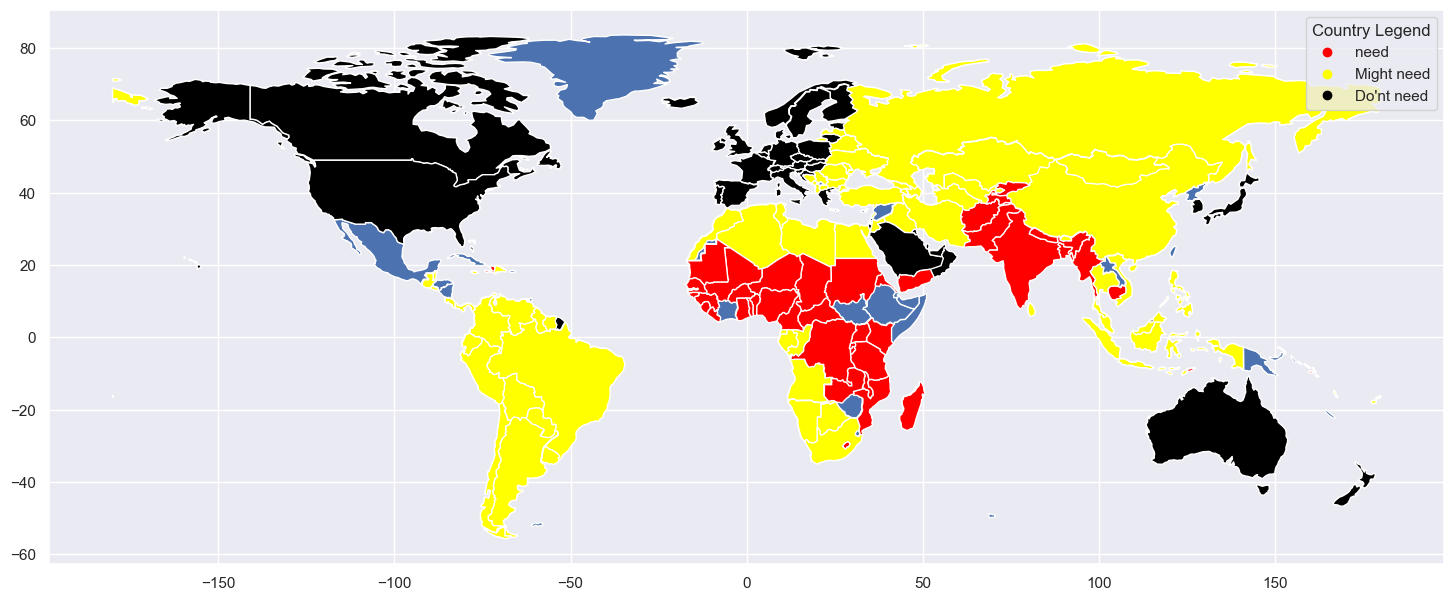

In [ ]:
clusterNames = {2:"need", 0:"Might need" , 1:"Do'nt need"}
plot_world_map(lev, clusterNames)
